# 🧠 Mental Health Analysis

This notebook provides an in-depth analysis of mental health data using various machine learning models and techniques. 


In [578]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from geopy.geocoders import Nominatim
from wordcloud import WordCloud
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.naive_bayes import GaussianNB 
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import plot_tree, DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from IPython.display import display, Markdown, Latex
from sklearn.datasets import make_blobs
from matplotlib.widgets import Slider
import logging
from sklearn.neighbors import KNeighborsClassifier

from joblib import Parallel, delayed

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [444]:
data = pd.read_csv('train.csv')
data.head(5)

id      Name  Gender   Age           City Working Professional or Student  \
0   0  Aaradhya  Female  49.0       Ludhiana            Working Professional   
1   1     Vivan    Male  26.0       Varanasi            Working Professional   
2   2    Yuvraj    Male  33.0  Visakhapatnam                         Student   
3   3    Yuvraj    Male  22.0         Mumbai            Working Professional   
4   4      Rhea  Female  30.0         Kanpur            Working Professional   

         Profession  Academic Pressure  Work Pressure  CGPA  \
0              Chef                NaN            5.0   NaN   
1           Teacher                NaN            4.0   NaN   
2               NaN                5.0            NaN  8.97   
3           Teacher                NaN            5.0   NaN   
4  Business Analyst                NaN            1.0   NaN   

   Study Satisfaction  Job Satisfaction     Sleep Duration Dietary Habits  \
0                 NaN               2.0  More than 8 hours        Healthy   
1                 NaN               3.0  Less than 5 hours      Unhealthy   
2                 2.0               NaN          5-6 hours        Healthy   
3                 NaN               1.0  Less than 5 hours       Moderate   
4                 NaN               1.0          5-6 hours      Unhealthy   

    Degree Have you ever had suicidal thoughts ?  Work/Study Hours  \
0      BHM                                    No               1.0   
1      LLB                                   Yes               7.0   
2  B.Pharm                                   Yes               3.0   
3      BBA                                   Yes              10.0   
4      BBA                                   Yes               9.0   

   Financial Stress Family History of Mental Illness  Depression  
0               2.0                               No           0  
1               3.0                               No           1  
2               1.0                               No           1  
3               1.0                              Yes           1  
4               4.0                              Yes           0

## 🧹 Data Cleaning

In this section, we clean and preprocess the dataset to ensure it's ready for analysis:
- Handling missing values.

In [445]:
null_counts = data.isnull().sum()

print("Null values per column:")
print(null_counts)

Null values per column:
id                                            0
Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                36630
Academic Pressure                        112803
Work Pressure                             27918
CGPA                                     112802
Study Satisfaction                       112803
Job Satisfaction                          27910
Sleep Duration                                0
Dietary Habits                                4
Degree                                        2
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              4
Family History of Mental Illness              0
Depression                                    0
dtype: int64


In [446]:
data.loc[(data['Working Professional or Student'] == 'Student') & (data['Profession'].isna()), 'Profession'] = 'Student'

In [447]:
data.head(5)

id      Name  Gender   Age           City Working Professional or Student  \
0   0  Aaradhya  Female  49.0       Ludhiana            Working Professional   
1   1     Vivan    Male  26.0       Varanasi            Working Professional   
2   2    Yuvraj    Male  33.0  Visakhapatnam                         Student   
3   3    Yuvraj    Male  22.0         Mumbai            Working Professional   
4   4      Rhea  Female  30.0         Kanpur            Working Professional   

         Profession  Academic Pressure  Work Pressure  CGPA  \
0              Chef                NaN            5.0   NaN   
1           Teacher                NaN            4.0   NaN   
2           Student                5.0            NaN  8.97   
3           Teacher                NaN            5.0   NaN   
4  Business Analyst                NaN            1.0   NaN   

   Study Satisfaction  Job Satisfaction     Sleep Duration Dietary Habits  \
0                 NaN               2.0  More than 8 hours        Healthy   
1                 NaN               3.0  Less than 5 hours      Unhealthy   
2                 2.0               NaN          5-6 hours        Healthy   
3                 NaN               1.0  Less than 5 hours       Moderate   
4                 NaN               1.0          5-6 hours      Unhealthy   

    Degree Have you ever had suicidal thoughts ?  Work/Study Hours  \
0      BHM                                    No               1.0   
1      LLB                                   Yes               7.0   
2  B.Pharm                                   Yes               3.0   
3      BBA                                   Yes              10.0   
4      BBA                                   Yes               9.0   

   Financial Stress Family History of Mental Illness  Depression  
0               2.0                               No           0  
1               3.0                               No           1  
2               1.0                               No           1  
3               1.0                              Yes           1  
4               4.0                              Yes           0

In [448]:
data['Pressure'] = data['Academic Pressure'].combine_first(data['Work Pressure'])

data = data.drop(columns=['Academic Pressure', 'Work Pressure'])

In [449]:
data.head(5)

id      Name  Gender   Age           City Working Professional or Student  \
0   0  Aaradhya  Female  49.0       Ludhiana            Working Professional   
1   1     Vivan    Male  26.0       Varanasi            Working Professional   
2   2    Yuvraj    Male  33.0  Visakhapatnam                         Student   
3   3    Yuvraj    Male  22.0         Mumbai            Working Professional   
4   4      Rhea  Female  30.0         Kanpur            Working Professional   

         Profession  CGPA  Study Satisfaction  Job Satisfaction  \
0              Chef   NaN                 NaN               2.0   
1           Teacher   NaN                 NaN               3.0   
2           Student  8.97                 2.0               NaN   
3           Teacher   NaN                 NaN               1.0   
4  Business Analyst   NaN                 NaN               1.0   

      Sleep Duration Dietary Habits   Degree  \
0  More than 8 hours        Healthy      BHM   
1  Less than 5 hours      Unhealthy      LLB   
2          5-6 hours        Healthy  B.Pharm   
3  Less than 5 hours       Moderate      BBA   
4          5-6 hours      Unhealthy      BBA   

  Have you ever had suicidal thoughts ?  Work/Study Hours  Financial Stress  \
0                                    No               1.0               2.0   
1                                   Yes               7.0               3.0   
2                                   Yes               3.0               1.0   
3                                   Yes              10.0               1.0   
4                                   Yes               9.0               4.0   

  Family History of Mental Illness  Depression  Pressure  
0                               No           0       5.0  
1                               No           1       4.0  
2                               No           1       5.0  
3                              Yes           1       5.0  
4                              Yes           0       1.0

In [450]:
print(data['Sleep Duration'].value_counts())
data['Sleep Duration'] = data['Sleep Duration'].replace({
'Less than 5 hours': 4,
'5-6 hours': 5.5,
'7-8 hours': 7.5,
'More than 8 hours': 9,
'1-2 hours': 2,
'2-3 hours': 3,
'3-4 hours': 4,
'4-5 hours': 4.5,
'4-6 hours': 5,
'5-6 hours': 5.5,
'6-7 hours': 6.5,
'6-8 hours': 7,
'7-8 hours': 7.5,
'8-9 hours': 8.5,
'9-11 hours': 10,
'10-11 hours': 10.5,
'40-45 hours': None,
'45': None,
'45-48 hours': None,
'49 hours': None,
'55-66 hours': None,
'1-3 hours': 3,
'1-6 hours': None,
'3-6 hours': 5,
'8 hours': 8,
'9-5': 7,
'9-5 hours': 7,
'9-6 hours': 7.5,
'Indore': None,
'Moderate': None,
'Pune': None,
'Sleep_Duration': None,
'Unhealthy': None,
'Work_Study_Hours': None,
'No': None,
'35-36 hours':None,
'10-6 hours':8,
'than 5 hours':5
}
)

Sleep Duration
Less than 5 hours    38784
7-8 hours            36969
More than 8 hours    32726
5-6 hours            32142
3-4 hours               12
6-7 hours                8
4-5 hours                7
4-6 hours                5
2-3 hours                5
6-8 hours                4
No                       4
1-6 hours                4
10-11 hours              2
9-11 hours               2
8-9 hours                2
Sleep_Duration           2
Unhealthy                2
45                       2
40-45 hours              1
1-2 hours                1
1-3 hours                1
9-6 hours                1
55-66 hours              1
Moderate                 1
35-36 hours              1
8 hours                  1
10-6 hours               1
Indore                   1
than 5 hours             1
49 hours                 1
Work_Study_Hours         1
3-6 hours                1
45-48 hours              1
9-5                      1
Pune                     1
9-5 hours                1
Name: count, 

/tmp/ipykernel_474/1642088292.py:2: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [451]:
data['Satisfaction'] = data['Study Satisfaction'].combine_first(data['Job Satisfaction'])

data = data.drop(columns=['Job Satisfaction', 'Study Satisfaction'])

In [452]:
data.head(5)

id      Name  Gender   Age           City Working Professional or Student  \
0   0  Aaradhya  Female  49.0       Ludhiana            Working Professional   
1   1     Vivan    Male  26.0       Varanasi            Working Professional   
2   2    Yuvraj    Male  33.0  Visakhapatnam                         Student   
3   3    Yuvraj    Male  22.0         Mumbai            Working Professional   
4   4      Rhea  Female  30.0         Kanpur            Working Professional   

         Profession  CGPA  Sleep Duration Dietary Habits   Degree  \
0              Chef   NaN             9.0        Healthy      BHM   
1           Teacher   NaN             4.0      Unhealthy      LLB   
2           Student  8.97             5.5        Healthy  B.Pharm   
3           Teacher   NaN             4.0       Moderate      BBA   
4  Business Analyst   NaN             5.5      Unhealthy      BBA   

  Have you ever had suicidal thoughts ?  Work/Study Hours  Financial Stress  \
0                                    No               1.0               2.0   
1                                   Yes               7.0               3.0   
2                                   Yes               3.0               1.0   
3                                   Yes              10.0               1.0   
4                                   Yes               9.0               4.0   

  Family History of Mental Illness  Depression  Pressure  Satisfaction  
0                               No           0       5.0           2.0  
1                               No           1       4.0           3.0  
2                               No           1       5.0           2.0  
3                              Yes           1       5.0           1.0  
4                              Yes           0       1.0           1.0

In [453]:
data.shape

(140700, 18)

In [454]:
null_counts = data.isnull().sum()

print("Null values per column:")
print(null_counts)

Null values per column:
id                                            0
Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                 8763
CGPA                                     112802
Sleep Duration                               23
Dietary Habits                                4
Degree                                        2
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              4
Family History of Mental Illness              0
Depression                                    0
Pressure                                     21
Satisfaction                                 15
dtype: int64


In [455]:
data['Profession'] = data['Profession'].fillna('Unknown')

In [456]:
null_counts = data.isnull().sum()

print("Null values per column:")
print(null_counts)

Null values per column:
id                                            0
Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                    0
CGPA                                     112802
Sleep Duration                               23
Dietary Habits                                4
Degree                                        2
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              4
Family History of Mental Illness              0
Depression                                    0
Pressure                                     21
Satisfaction                                 15
dtype: int64


In [457]:
count_working_professional = (data['Working Professional or Student'] == 'Working Professional').sum()
count_Students = (data['Working Professional or Student'] == 'Student').sum()

print("Count of 'Working Professional':", count_working_professional)
print("Count of 'Students':", count_Students)

Count of 'Working Professional': 112799
Count of 'Students': 27901


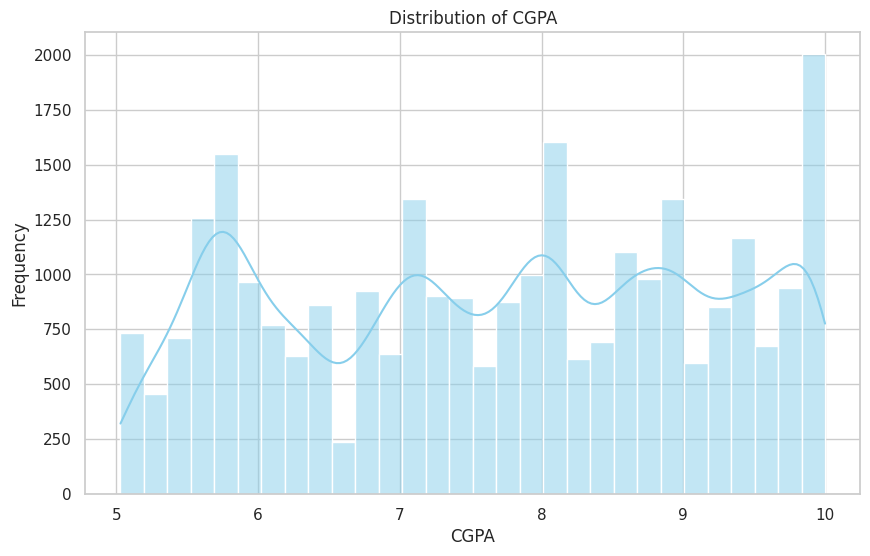

In [458]:
cgpa_data = data['CGPA'].dropna()

plt.figure(figsize=(10, 6))
sns.histplot(cgpa_data, bins=30, kde=True, color='skyblue')

plt.title('Distribution of CGPA')
plt.xlabel('CGPA')
plt.ylabel('Frequency')

plt.show()

In [459]:
median_cgpa = data['CGPA'].median()

In [460]:
data['CGPA'] = data.apply(lambda row: -1 if row['Working Professional or Student'] == "Working Professional" else row['CGPA'], axis=1)

In [461]:
null_counts = data.isnull().sum()

print("Null values per column:")
print(null_counts)

Null values per column:
id                                        0
Name                                      0
Gender                                    0
Age                                       0
City                                      0
Working Professional or Student           0
Profession                                0
CGPA                                      9
Sleep Duration                           23
Dietary Habits                            4
Degree                                    2
Have you ever had suicidal thoughts ?     0
Work/Study Hours                          0
Financial Stress                          4
Family History of Mental Illness          0
Depression                                0
Pressure                                 21
Satisfaction                             15
dtype: int64


In [462]:
cgpa_null_rows = data[data['CGPA'].isnull()]

print("Rows where CGPA is NULL:")
print(cgpa_null_rows)

Rows where CGPA is NULL:
            id      Name  Gender   Age       City  \
21880    21880    Aarush    Male  38.0    Chennai   
52737    52737     Aarav    Male  28.0   Vadodara   
58062    58062    Ishita  Female  32.0   Vadodara   
70453    70453      Veda  Female  20.0  Ahmedabad   
75007    75007     Aarav    Male  21.0    Lucknow   
105773  105773     Anand    Male  18.0  Ahmedabad   
110097  110097   Abhinav    Male  34.0       Pune   
129756  129756      Kian    Male  18.0     Rajkot   
134830  134830  Aaradhya  Female  24.0     Meerut   

       Working Professional or Student Profession  CGPA  Sleep Duration  \
21880                          Student    Student   NaN             5.5   
52737                          Student    Student   NaN             4.0   
58062                          Student    Student   NaN             4.0   
70453                          Student    Student   NaN             4.0   
75007                          Student    Student   NaN             7

In [463]:
data['CGPA'] = data['CGPA'].fillna(median_cgpa)

In [464]:
null_counts = data.isnull().sum()

print("Null values per column:")
print(null_counts)

Null values per column:
id                                        0
Name                                      0
Gender                                    0
Age                                       0
City                                      0
Working Professional or Student           0
Profession                                0
CGPA                                      0
Sleep Duration                           23
Dietary Habits                            4
Degree                                    2
Have you ever had suicidal thoughts ?     0
Work/Study Hours                          0
Financial Stress                          4
Family History of Mental Illness          0
Depression                                0
Pressure                                 21
Satisfaction                             15
dtype: int64


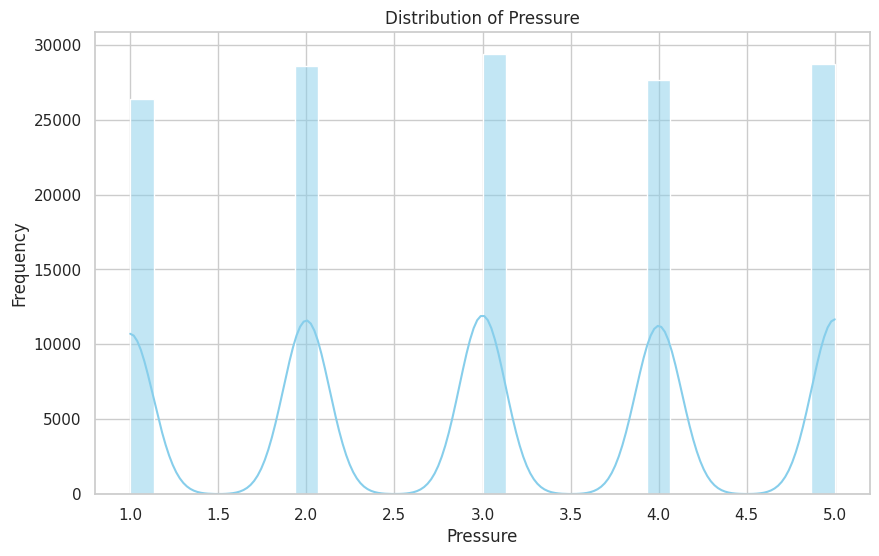

In [465]:
Pressure_data = data['Pressure'].dropna()

plt.figure(figsize=(10, 6))
sns.histplot(Pressure_data, bins=30, kde=True, color='skyblue')

plt.title('Distribution of Pressure')
plt.xlabel('Pressure')
plt.ylabel('Frequency')

plt.show()

In [466]:
median_Pressure = data['Pressure'].median()
data['Pressure'] = data['Pressure'].fillna(median_Pressure)

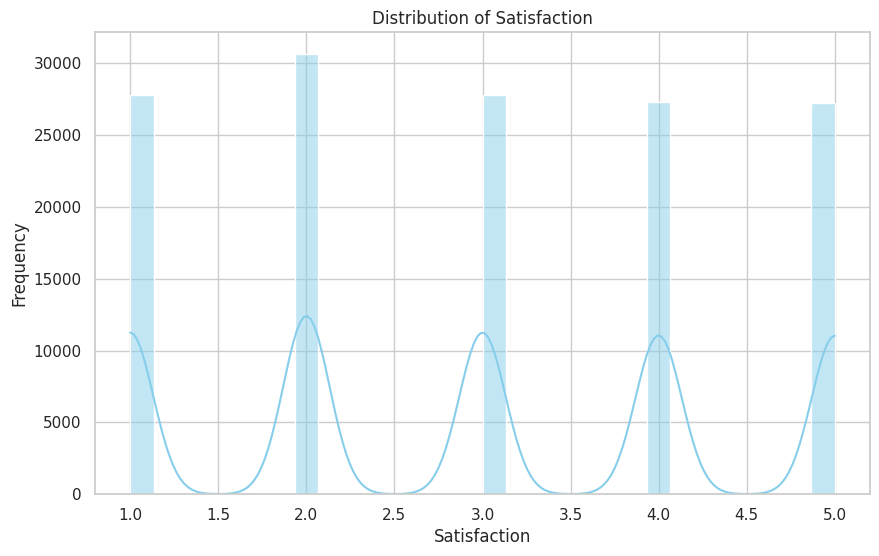

In [467]:
Satisfaction_data = data['Satisfaction'].dropna()

plt.figure(figsize=(10, 6))
sns.histplot(Satisfaction_data, bins=30, kde=True, color='skyblue')

plt.title('Distribution of Satisfaction')
plt.xlabel('Satisfaction')
plt.ylabel('Frequency')

plt.show()

In [468]:
median_Satisfaction = data['Satisfaction'].median()
data['Satisfaction'] = data['Satisfaction'].fillna(median_Satisfaction)

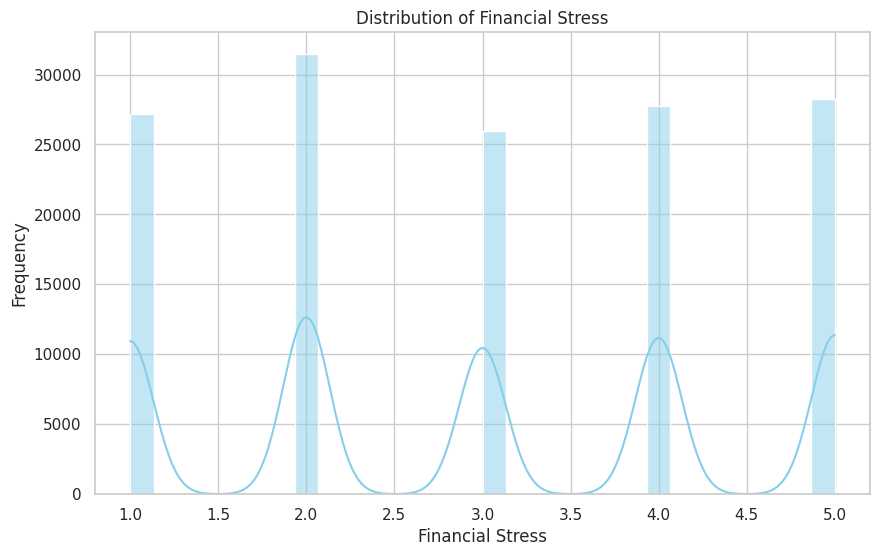

In [469]:
Financial_Stress_data = data['Financial Stress'].dropna()

plt.figure(figsize=(10, 6))
sns.histplot(Financial_Stress_data, bins=30, kde=True, color='skyblue')

plt.title('Distribution of Financial Stress')
plt.xlabel('Financial Stress')
plt.ylabel('Frequency')

plt.show()

In [470]:
median_Financial_Stress = data['Financial Stress'].median()
data['Financial Stress'] = data['Financial Stress'].fillna(median_Financial_Stress)

In [471]:
print(data['Dietary Habits'].unique())
print(data['Dietary Habits'].value_counts())
data['Dietary Habits'] = data['Dietary Habits'].apply(lambda x: x if x in ['Moderate', 'Unhealthy', 'Healthy'] else 'Moderate')

['Healthy' 'Unhealthy' 'Moderate' 'Yes' 'Pratham' 'BSc' 'Gender' '3'
 'More Healthy' 'Less than Healthy' 'Mihir' '1.0' 'Hormonal' 'Electrician'
 nan 'No Healthy' 'Less Healthy' 'M.Tech' 'Vegas' 'No' 'Male' 'Indoor'
 'Class 12' '2']
Dietary Habits
Moderate             49705
Unhealthy            46227
Healthy              44741
Yes                      2
More Healthy             2
No                       2
Pratham                  1
Gender                   1
BSc                      1
Less than Healthy        1
3                        1
1.0                      1
Hormonal                 1
Electrician              1
Mihir                    1
No Healthy               1
Less Healthy             1
M.Tech                   1
Vegas                    1
Male                     1
Indoor                   1
Class 12                 1
2                        1
Name: count, dtype: int64


In [472]:
data.shape

(140700, 18)

In [473]:
null_counts = data.isnull().sum()

print("Null values per column:")
print(null_counts)

Null values per column:
id                                        0
Name                                      0
Gender                                    0
Age                                       0
City                                      0
Working Professional or Student           0
Profession                                0
CGPA                                      0
Sleep Duration                           23
Dietary Habits                            0
Degree                                    2
Have you ever had suicidal thoughts ?     0
Work/Study Hours                          0
Financial Stress                          0
Family History of Mental Illness          0
Depression                                0
Pressure                                  0
Satisfaction                              0
dtype: int64


In [474]:
data = data.dropna(axis=0)

In [475]:
data.shape

(140675, 18)

In [476]:
data.head(5)

id      Name  Gender   Age           City Working Professional or Student  \
0   0  Aaradhya  Female  49.0       Ludhiana            Working Professional   
1   1     Vivan    Male  26.0       Varanasi            Working Professional   
2   2    Yuvraj    Male  33.0  Visakhapatnam                         Student   
3   3    Yuvraj    Male  22.0         Mumbai            Working Professional   
4   4      Rhea  Female  30.0         Kanpur            Working Professional   

         Profession  CGPA  Sleep Duration Dietary Habits   Degree  \
0              Chef -1.00             9.0        Healthy      BHM   
1           Teacher -1.00             4.0      Unhealthy      LLB   
2           Student  8.97             5.5        Healthy  B.Pharm   
3           Teacher -1.00             4.0       Moderate      BBA   
4  Business Analyst -1.00             5.5      Unhealthy      BBA   

  Have you ever had suicidal thoughts ?  Work/Study Hours  Financial Stress  \
0                                    No               1.0               2.0   
1                                   Yes               7.0               3.0   
2                                   Yes               3.0               1.0   
3                                   Yes              10.0               1.0   
4                                   Yes               9.0               4.0   

  Family History of Mental Illness  Depression  Pressure  Satisfaction  
0                               No           0       5.0           2.0  
1                               No           1       4.0           3.0  
2                               No           1       5.0           2.0  
3                              Yes           1       5.0           1.0  
4                              Yes           0       1.0           1.0

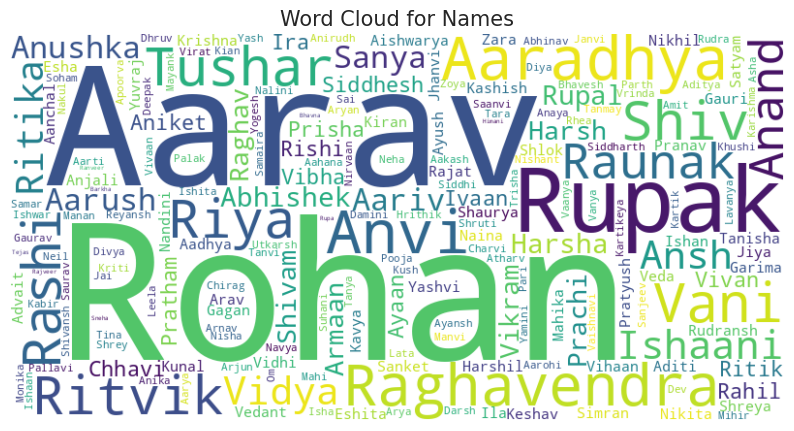

In [477]:
names_text = " ".join(data['Name'].dropna())

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(names_text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes for a cleaner look
plt.title("Word Cloud for Names", fontsize=15)
plt.show()


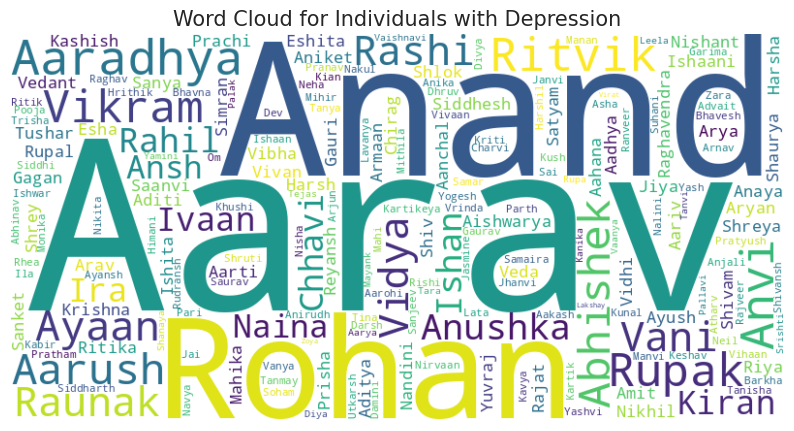

In [478]:
depressed_names = data[data['Depression'] == 1]['Name'].dropna()

names_text = " ".join(depressed_names)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(names_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Individuals with Depression", fontsize=15)
plt.show()

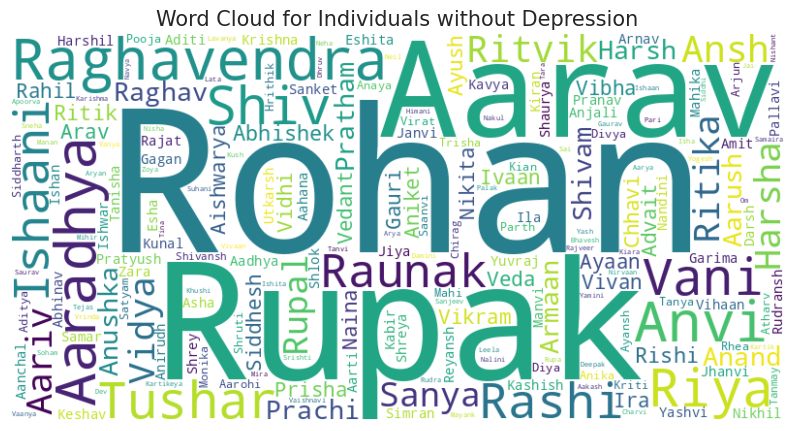

In [479]:
depressed_names = data[data['Depression'] == 0]['Name'].dropna()

names_text = " ".join(depressed_names)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(names_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Individuals without Depression", fontsize=15)
plt.show()

## 📊 Univariate Analysis

We explore individual features in the dataset to understand their distributions:
- Visualize feature distributions using histograms, box plots, and density plots.
- Analyze statistical summaries.

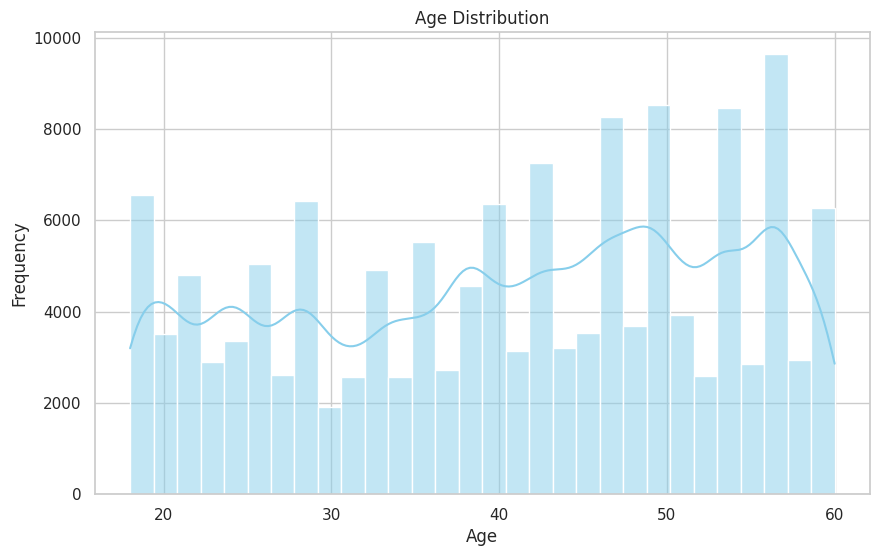

In [480]:
sns.set(style="whitegrid")

# **Visualize 'Age' (Numerical)**
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], bins=30, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

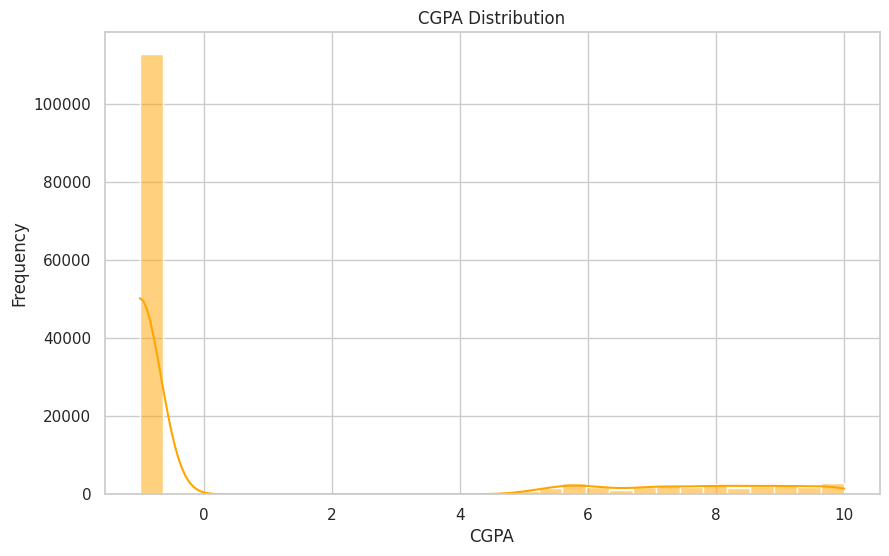

In [481]:
#**Visualize 'CGPA' (Numerical)**
plt.figure(figsize=(10, 6))
sns.histplot(data['CGPA'], bins=30, kde=True, color='orange')
plt.title('CGPA Distribution')
plt.xlabel('CGPA')
plt.ylabel('Frequency')
plt.show()

/tmp/ipykernel_474/1209439847.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




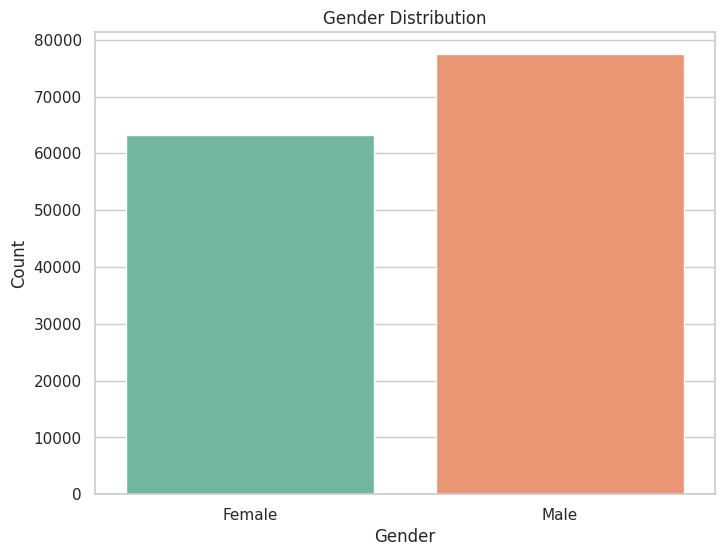

In [482]:
# **Visualize 'Gender' (Categorical)**
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=data, palette='Set2')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

/tmp/ipykernel_474/1675469861.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




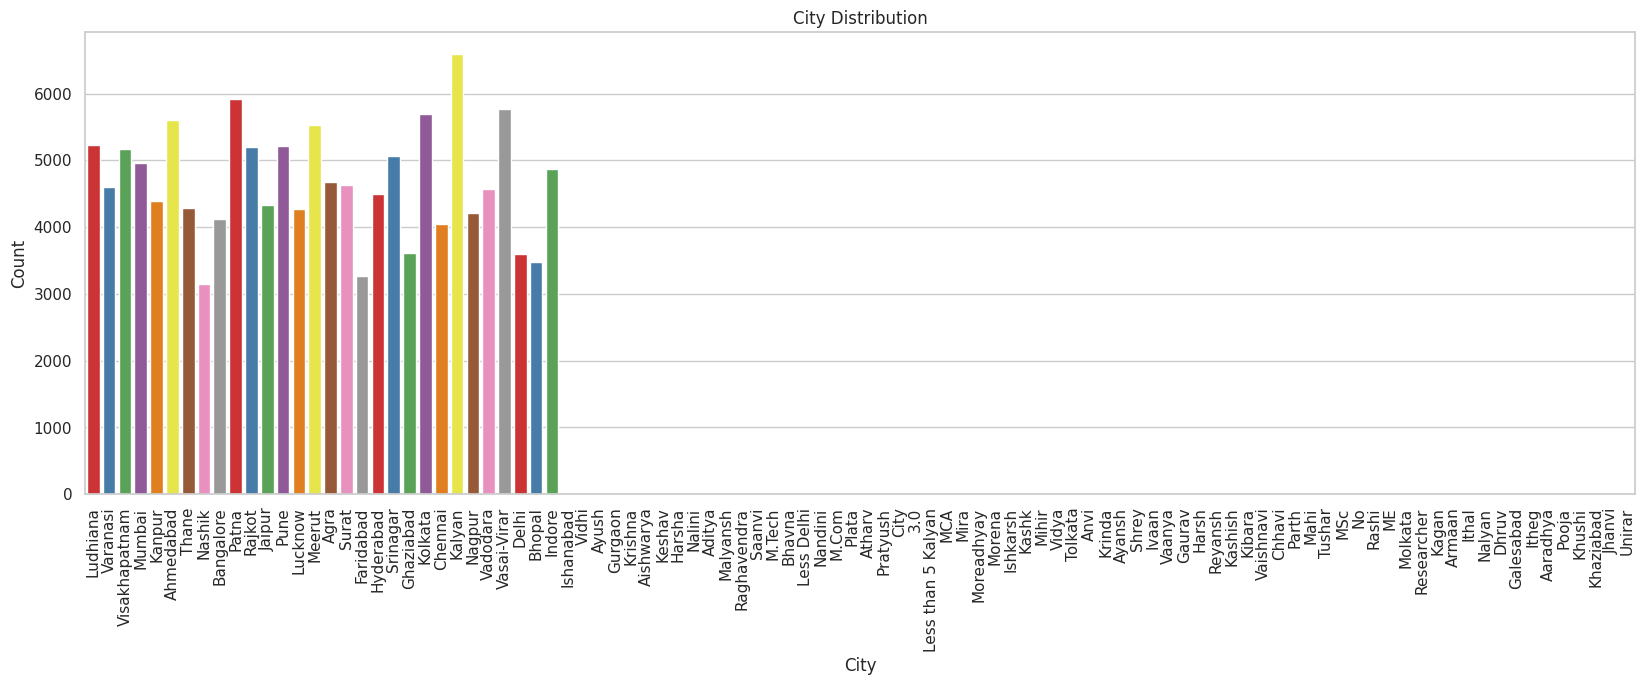

In [483]:
# **Visualize 'City' (Categorical)**
plt.figure(figsize=(20, 6))
sns.countplot(x='City', data=data, palette='Set1')
plt.title('City Distribution')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

/tmp/ipykernel_474/1159070710.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




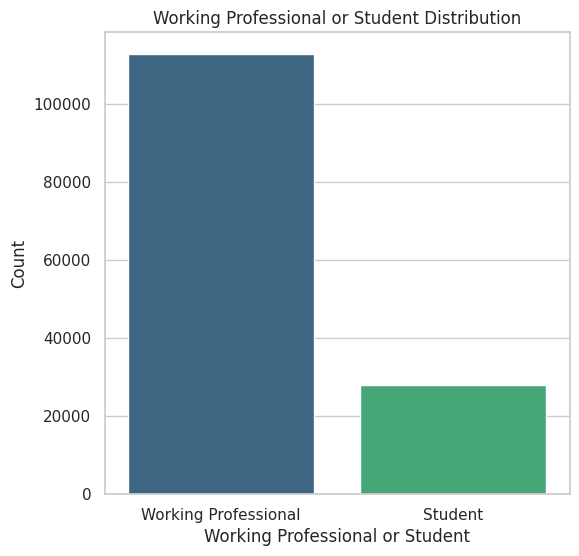

In [484]:
#**Visualize 'Working Professional or Student' (Categorical)**
plt.figure(figsize=(6, 6))
sns.countplot(x='Working Professional or Student', data=data, palette='viridis')
plt.title('Working Professional or Student Distribution')
plt.xlabel('Working Professional or Student')
plt.ylabel('Count')
plt.show()

/tmp/ipykernel_474/741850811.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




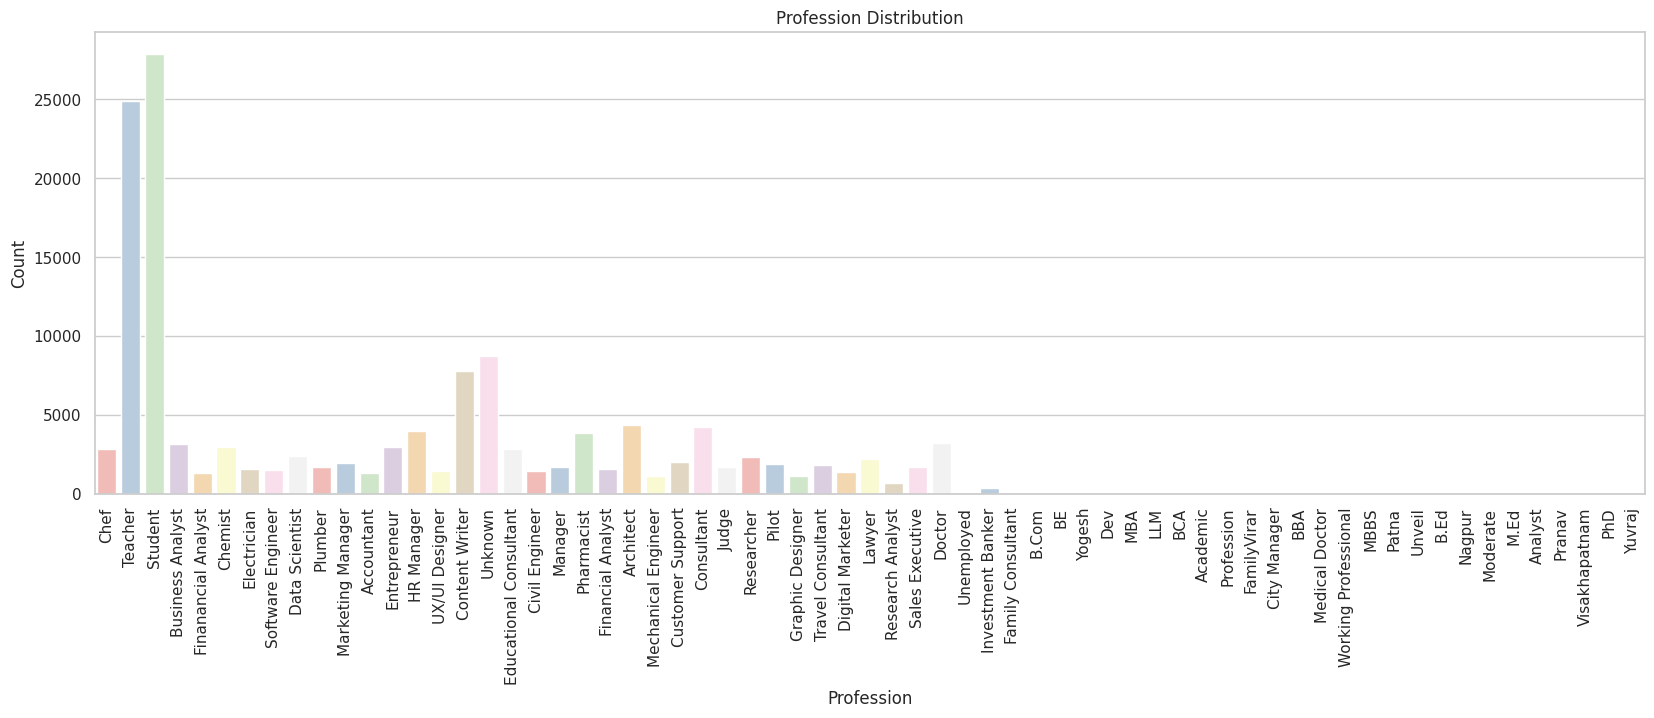

In [485]:
# **Visualize 'Profession' (Categorical)**
plt.figure(figsize=(20, 6))
sns.countplot(x='Profession', data=data, palette='Pastel1')
plt.title('Profession Distribution')
plt.xlabel('Profession')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

/tmp/ipykernel_474/1522671423.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




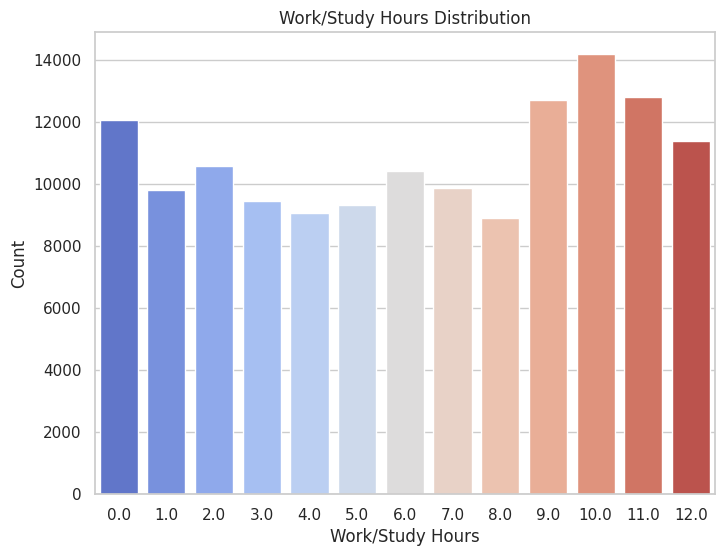

In [486]:
# **Visualize 'Work/Study Hours' (Categorical)**
plt.figure(figsize=(8, 6))
sns.countplot(x='Work/Study Hours', data=data, palette='coolwarm')
plt.title('Work/Study Hours Distribution')
plt.xlabel('Work/Study Hours')
plt.ylabel('Count')
plt.show()

/tmp/ipykernel_474/4113031520.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




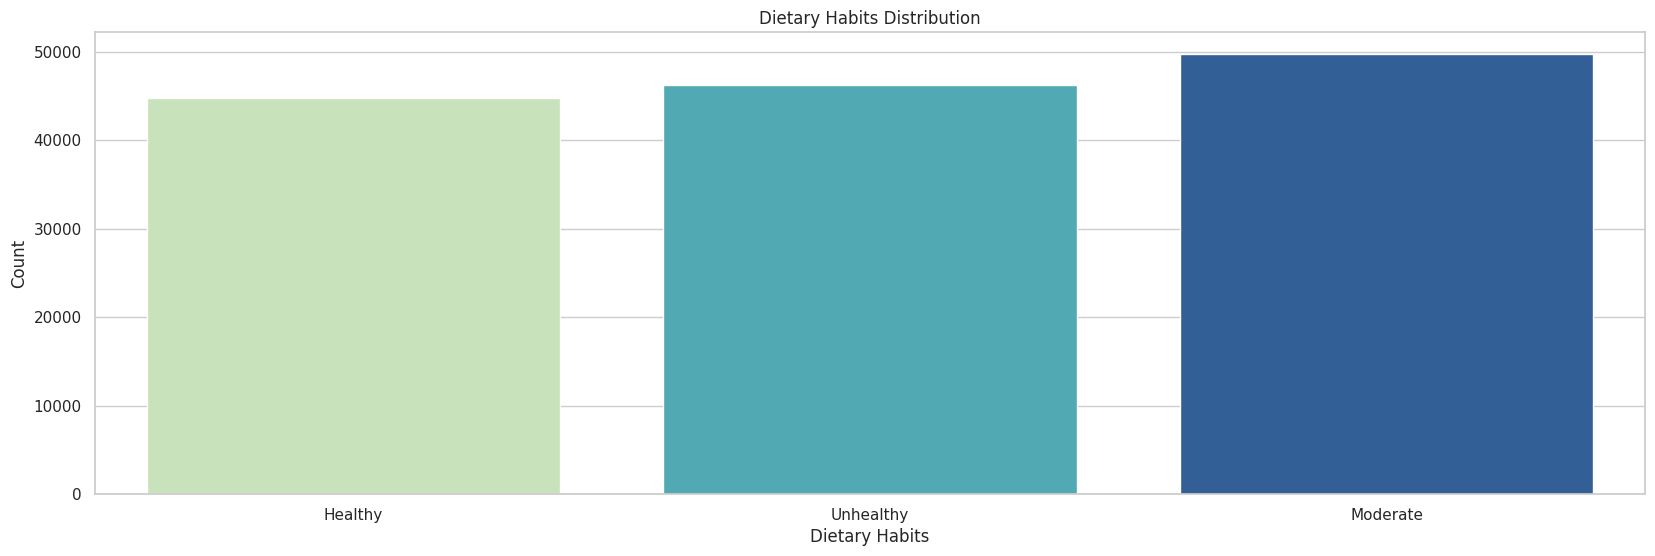

In [487]:
#**Visualize 'Dietary Habits' (Categorical)**
plt.figure(figsize=(20, 6))
sns.countplot(x='Dietary Habits', data=data, palette='YlGnBu')
plt.title('Dietary Habits Distribution')
plt.xlabel('Dietary Habits')
plt.ylabel('Count')
plt.show()

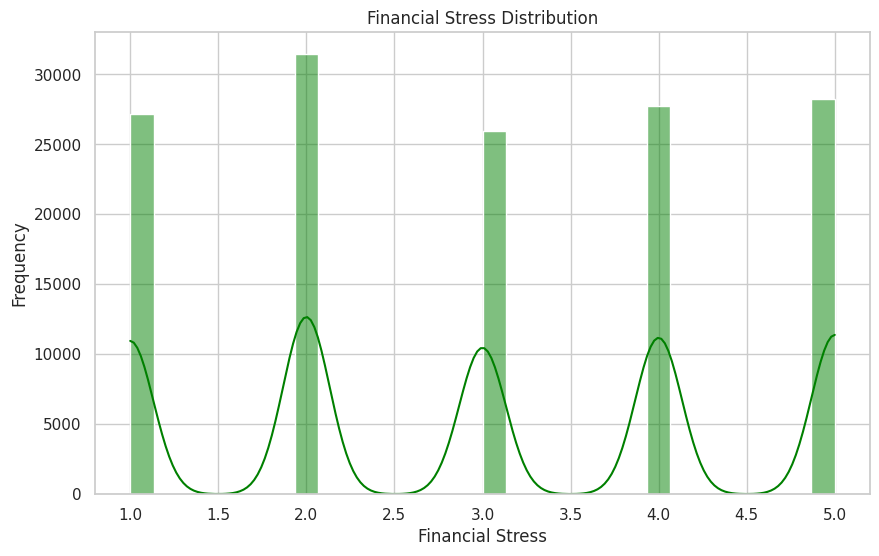

In [488]:
# **Visualize 'Financial Stress' (Numerical)**
plt.figure(figsize=(10, 6))
sns.histplot(data['Financial Stress'], bins=30, kde=True, color='green')
plt.title('Financial Stress Distribution')
plt.xlabel('Financial Stress')
plt.ylabel('Frequency')
plt.show()

/tmp/ipykernel_474/3999634159.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




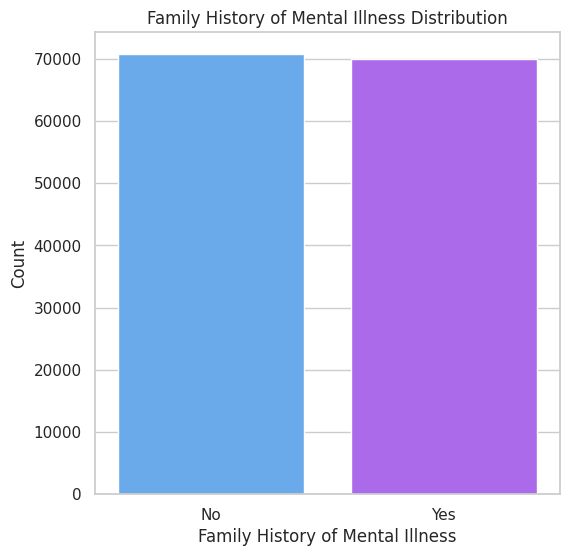

In [489]:
# **Visualize 'Family History of Mental Illness' (Categorical)**
plt.figure(figsize=(6, 6))
sns.countplot(x='Family History of Mental Illness', data=data, palette='cool')
plt.title('Family History of Mental Illness Distribution')
plt.xlabel('Family History of Mental Illness')
plt.ylabel('Count')
plt.show()

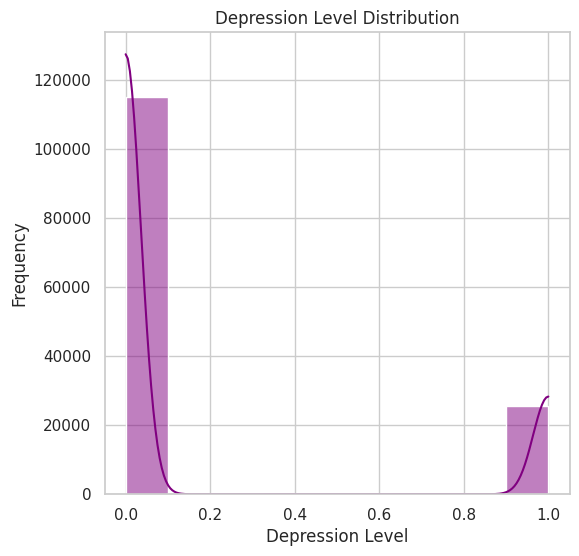

In [490]:
# **Visualize 'Depression' (Numerical)**
plt.figure(figsize=(6, 6))
sns.histplot(data['Depression'], bins=10, kde=True, color='purple')
plt.title('Depression Level Distribution')
plt.xlabel('Depression Level')
plt.ylabel('Frequency')
plt.show()

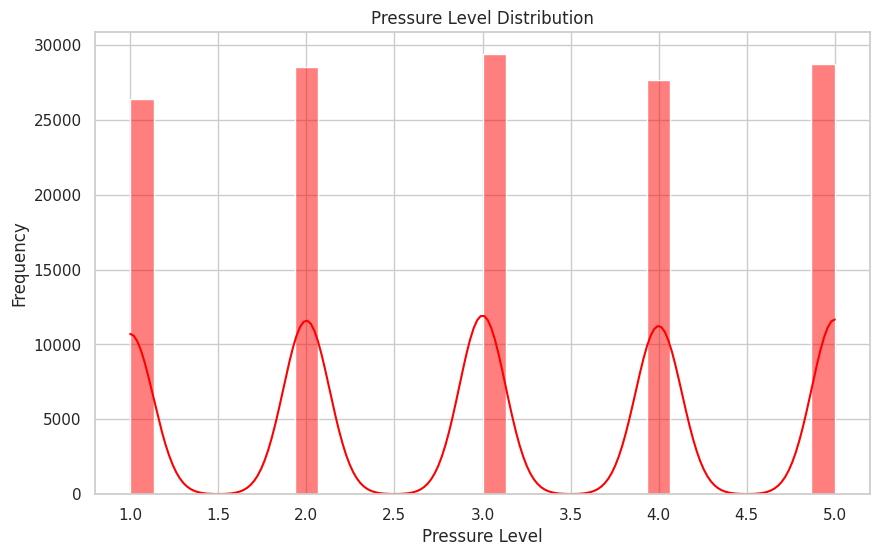

In [491]:
# **Visualize 'Pressure' (Numerical)**
plt.figure(figsize=(10, 6))
sns.histplot(data['Pressure'], bins=30, kde=True, color='red')
plt.title('Pressure Level Distribution')
plt.xlabel('Pressure Level')
plt.ylabel('Frequency')
plt.show()

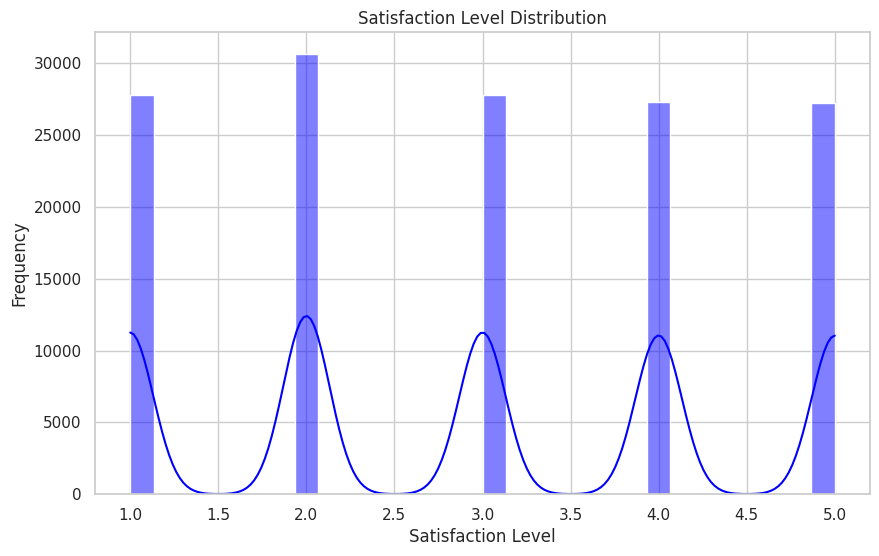

In [492]:
# **Visualize 'Satisfaction' (Numerical)**
plt.figure(figsize=(10, 6))
sns.histplot(data['Satisfaction'], bins=30, kde=True, color='blue')
plt.title('Satisfaction Level Distribution')
plt.xlabel('Satisfaction Level')
plt.ylabel('Frequency')
plt.show()

## 📈 Multivariate Analysis

This section delves into relationships between features:
- Correlation heatmaps to identify dependencies.
- Scatter plots, pair plots, and group comparisons.


/tmp/ipykernel_474/1878335154.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




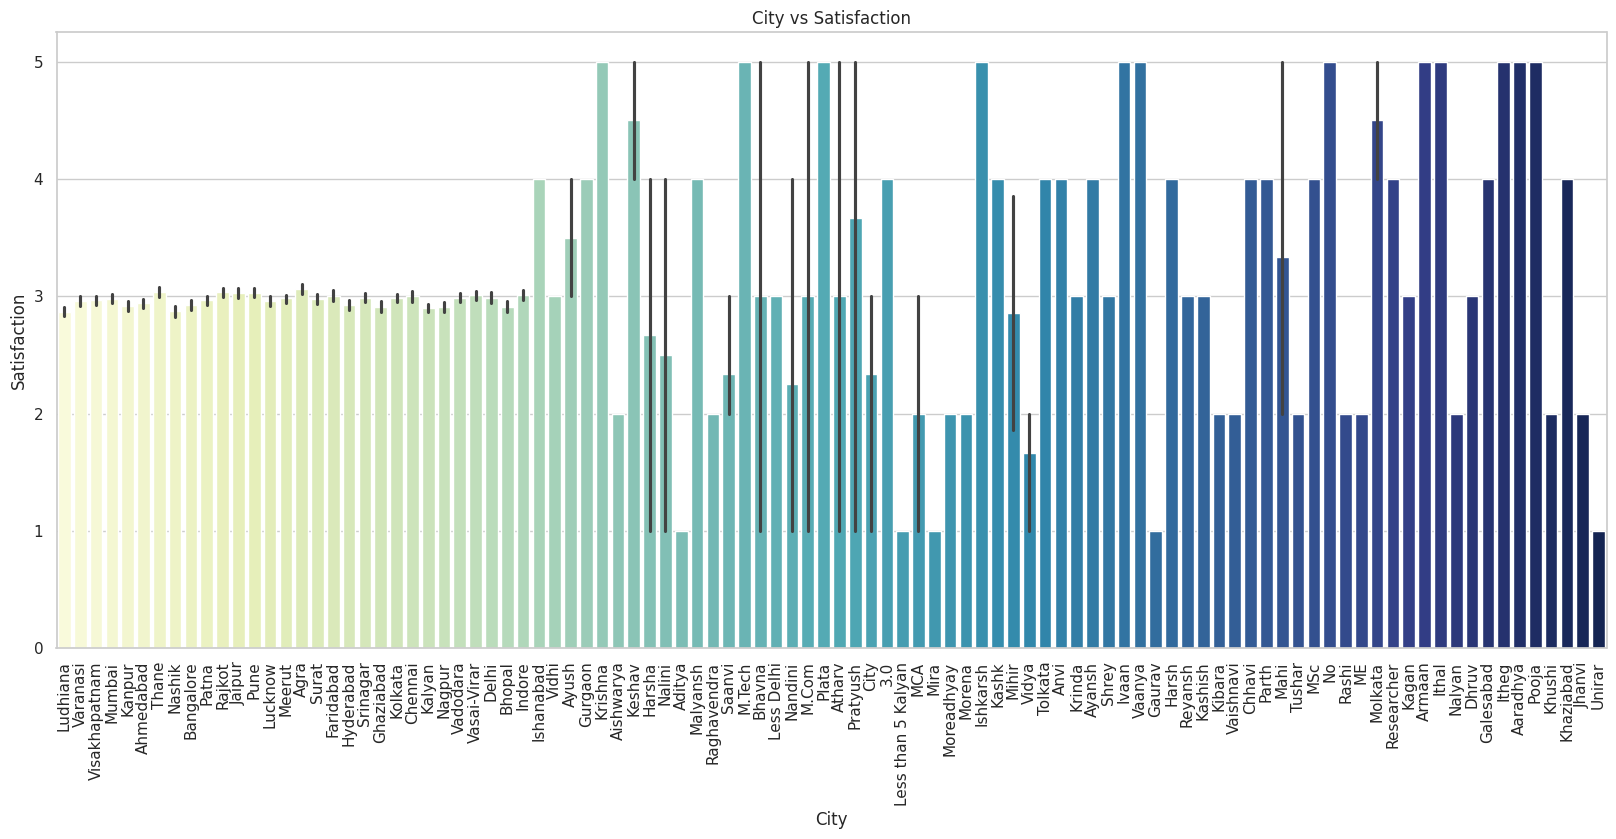

In [493]:
# 3. **Visualize relationship between 'City' and 'Satisfaction' using Bar Plot**
plt.figure(figsize=(20, 8))
sns.barplot(x='City', y='Satisfaction', data=data, palette='YlGnBu')
plt.title('City vs Satisfaction')
plt.xlabel('City')
plt.ylabel('Satisfaction')
plt.xticks(rotation=90)
plt.show()

/tmp/ipykernel_474/3185771263.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




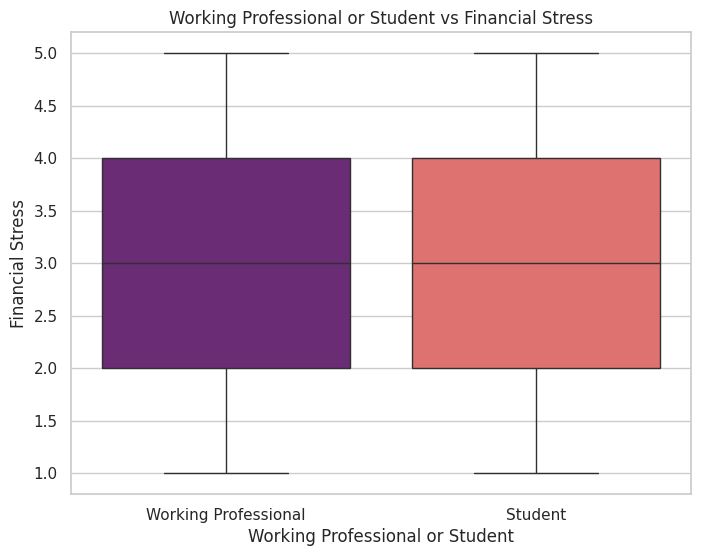

In [494]:
#**Visualize relationship between 'Working Professional or Student' and 'Financial Stress' using Box Plot**
plt.figure(figsize=(8, 6))
sns.boxplot(x='Working Professional or Student', y='Financial Stress', data=data, palette='magma')
plt.title('Working Professional or Student vs Financial Stress')
plt.xlabel('Working Professional or Student')
plt.ylabel('Financial Stress')
plt.show()

/tmp/ipykernel_474/3017044242.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




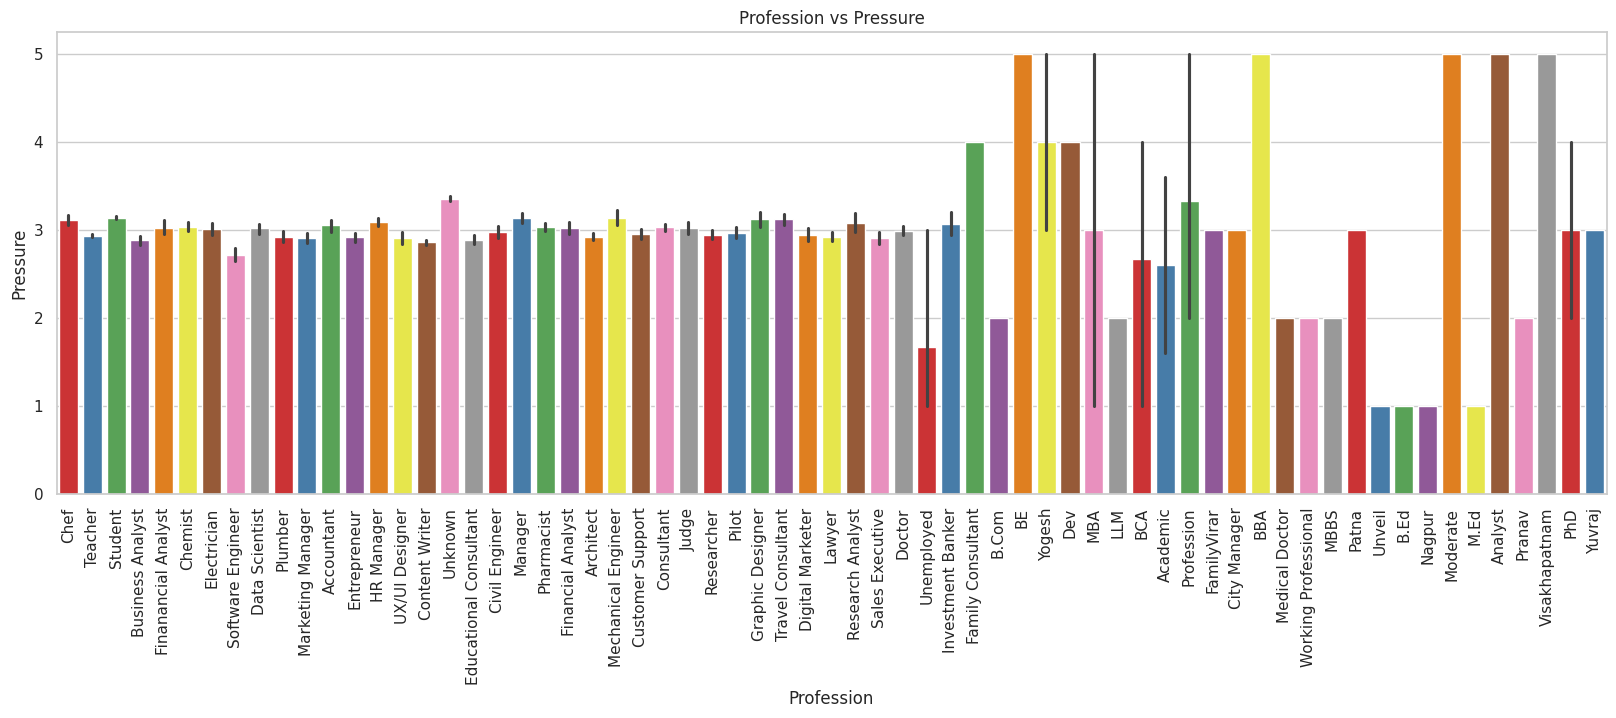

In [495]:
#**Visualize relationship between 'Profession' and 'Pressure' using Bar Plot**
plt.figure(figsize=(20, 6))
sns.barplot(x='Profession', y='Pressure', data=data, palette='Set1')
plt.title('Profession vs Pressure')
plt.xlabel('Profession')
plt.ylabel('Pressure')
plt.xticks(rotation=90)
plt.show()

/tmp/ipykernel_474/2412512268.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




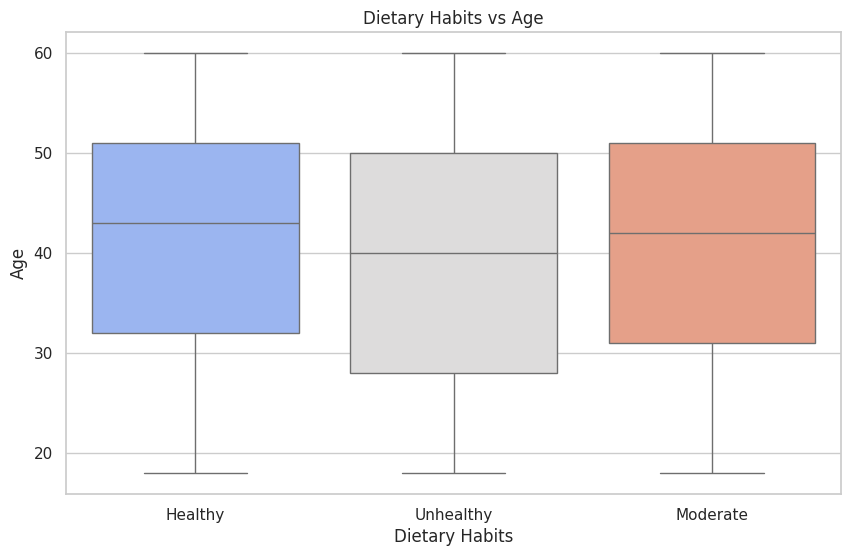

In [496]:
#**Visualize relationship between 'Dietary Habits' and 'Age' using Box Plot**
plt.figure(figsize=(10, 6))
sns.boxplot(x='Dietary Habits', y='Age', data=data, palette='coolwarm')
plt.title('Dietary Habits vs Age')
plt.xlabel('Dietary Habits')
plt.ylabel('Age')
plt.show()

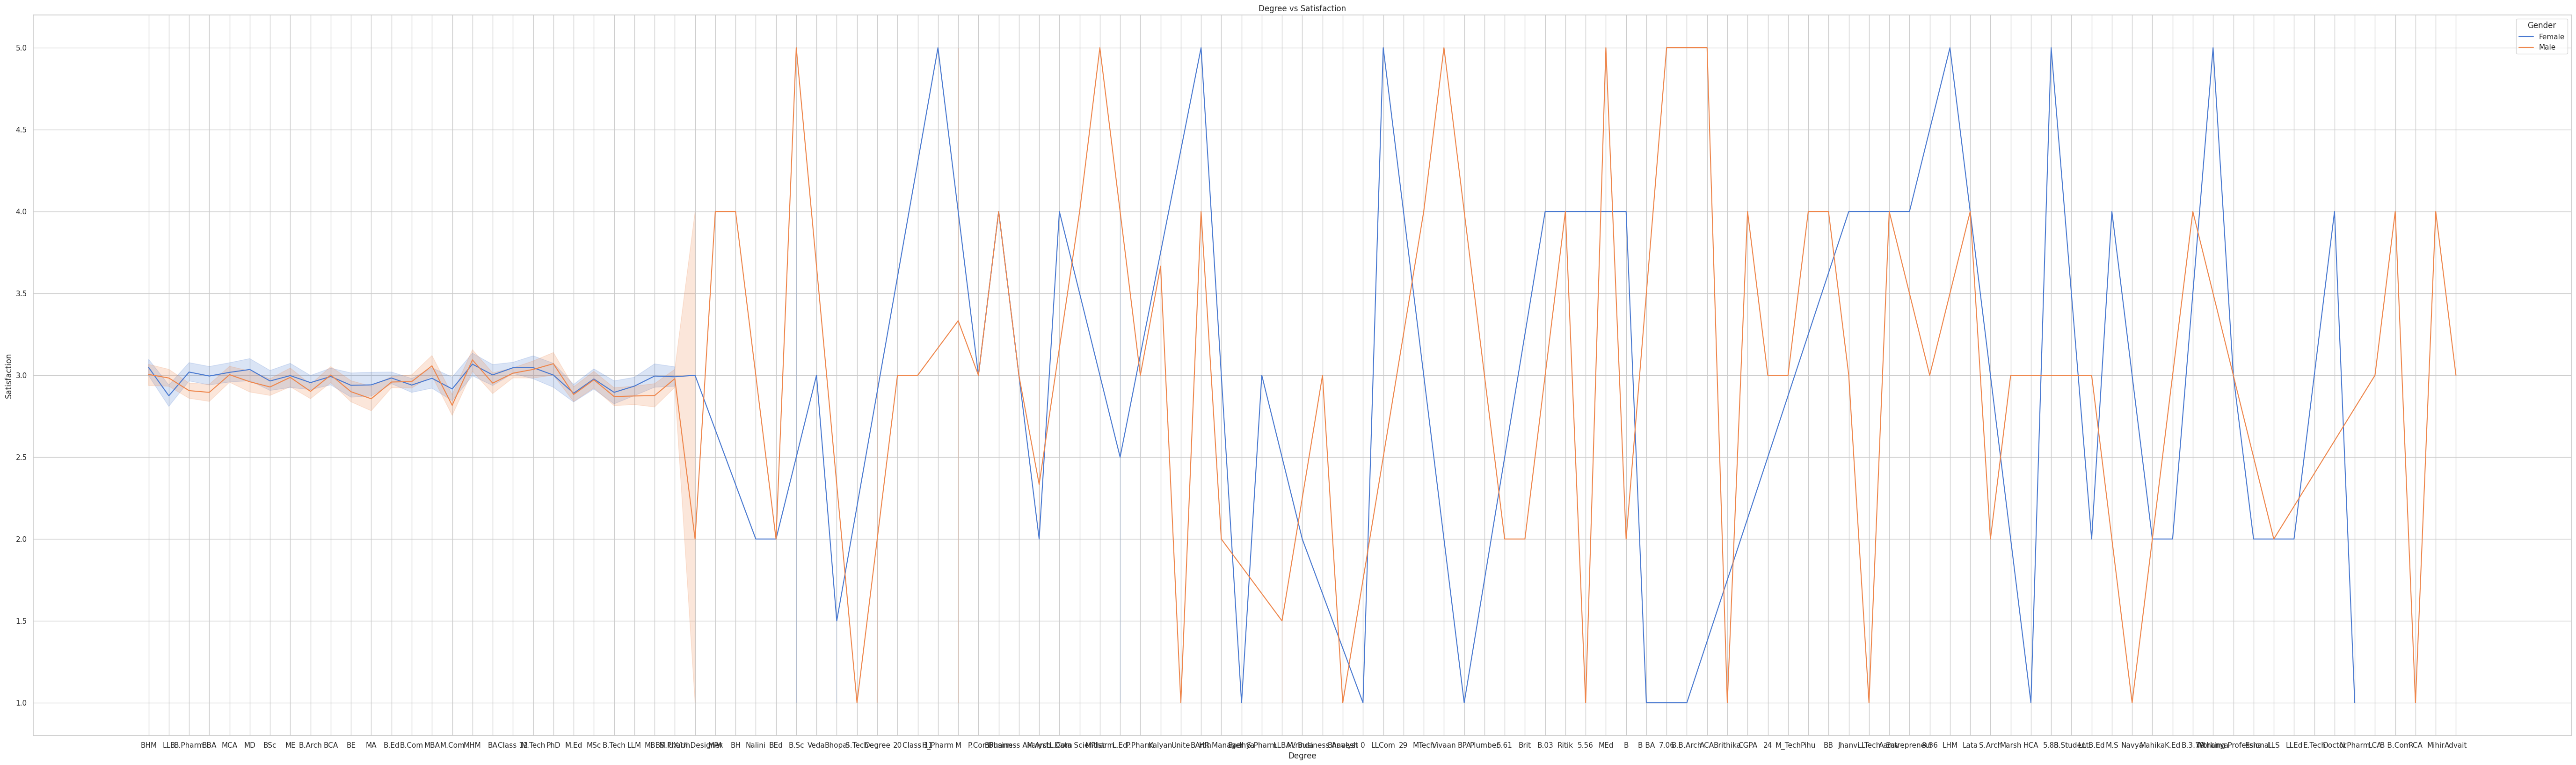

In [497]:
#Visualize relationship between 'Degree' and 'Satisfaction' using Line Plot
plt.figure(figsize=(70, 20))
sns.lineplot(x='Degree', y='Satisfaction', data=data, hue='Gender', palette='muted', markers=True)
plt.title('Degree vs Satisfaction')
plt.xlabel('Degree')
plt.ylabel('Satisfaction')
plt.show()

/tmp/ipykernel_474/2555148055.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




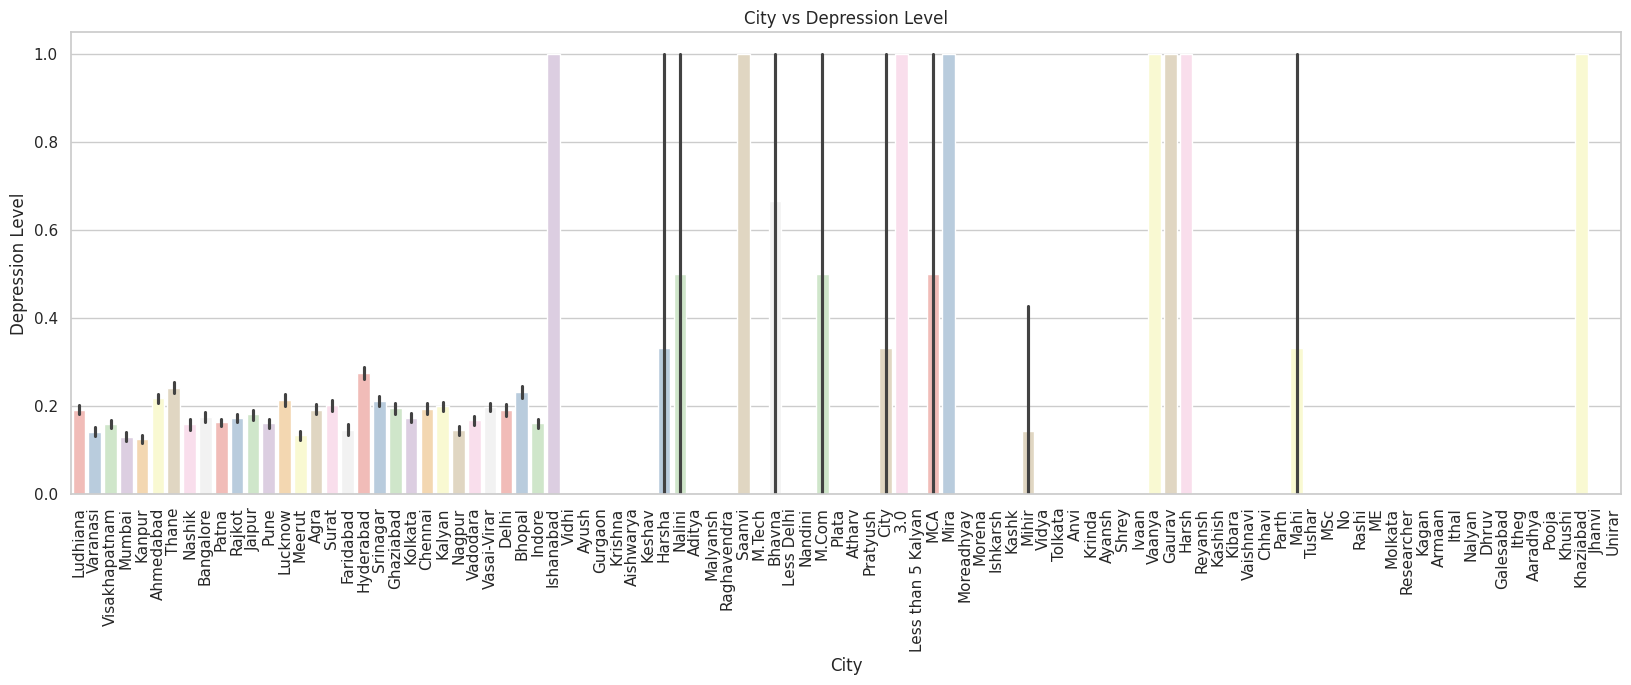

In [498]:
#**Visualize relationship between 'City' and 'Depression' using Bar Plot**
plt.figure(figsize=(20, 6))
sns.barplot(x='City', y='Depression', data=data, palette='Pastel1')
plt.title('City vs Depression Level')
plt.xlabel('City')
plt.ylabel('Depression Level')
plt.xticks(rotation=90)
plt.show()

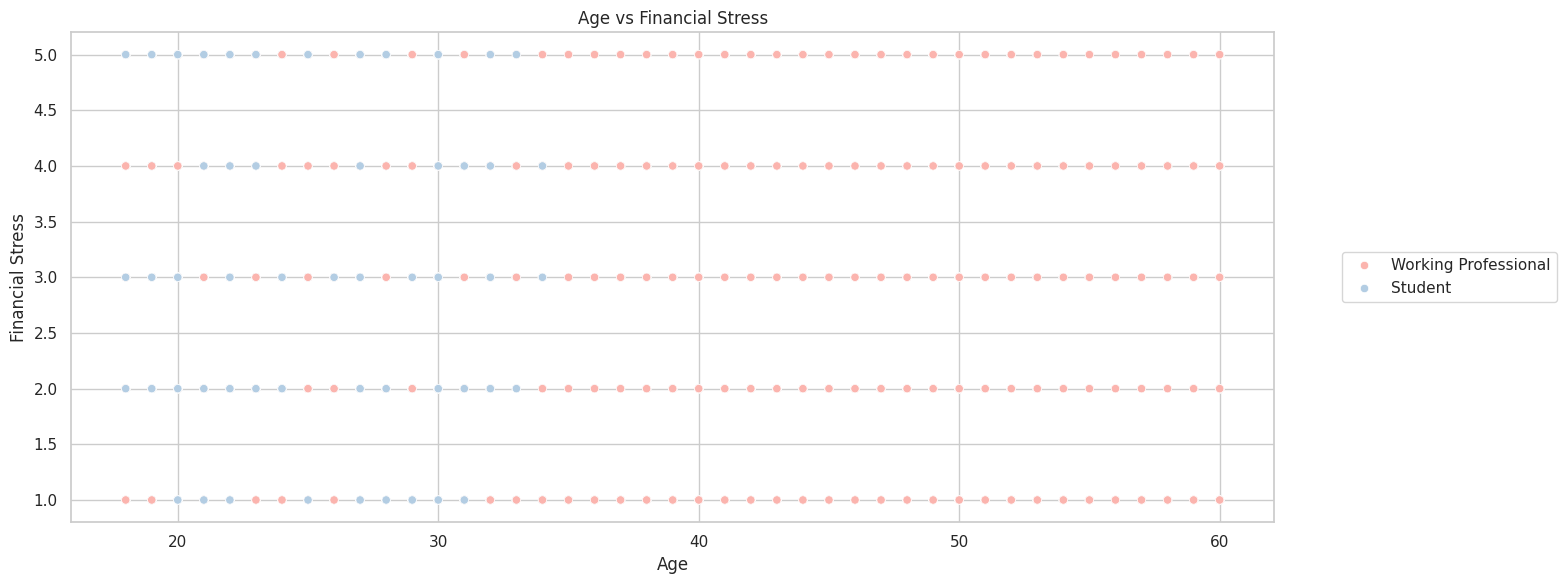

In [499]:
plt.figure(figsize=(20, 6))
sns.scatterplot(x='Age', y='Financial Stress', data=data, 
                hue='Working Professional or Student', palette='Pastel1')

plt.title('Age vs Financial Stress')
plt.xlabel('Age')
plt.ylabel('Financial Stress')

plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5))
plt.tight_layout(rect=[0,0,0.8,1])  # Adjust layout

plt.show()

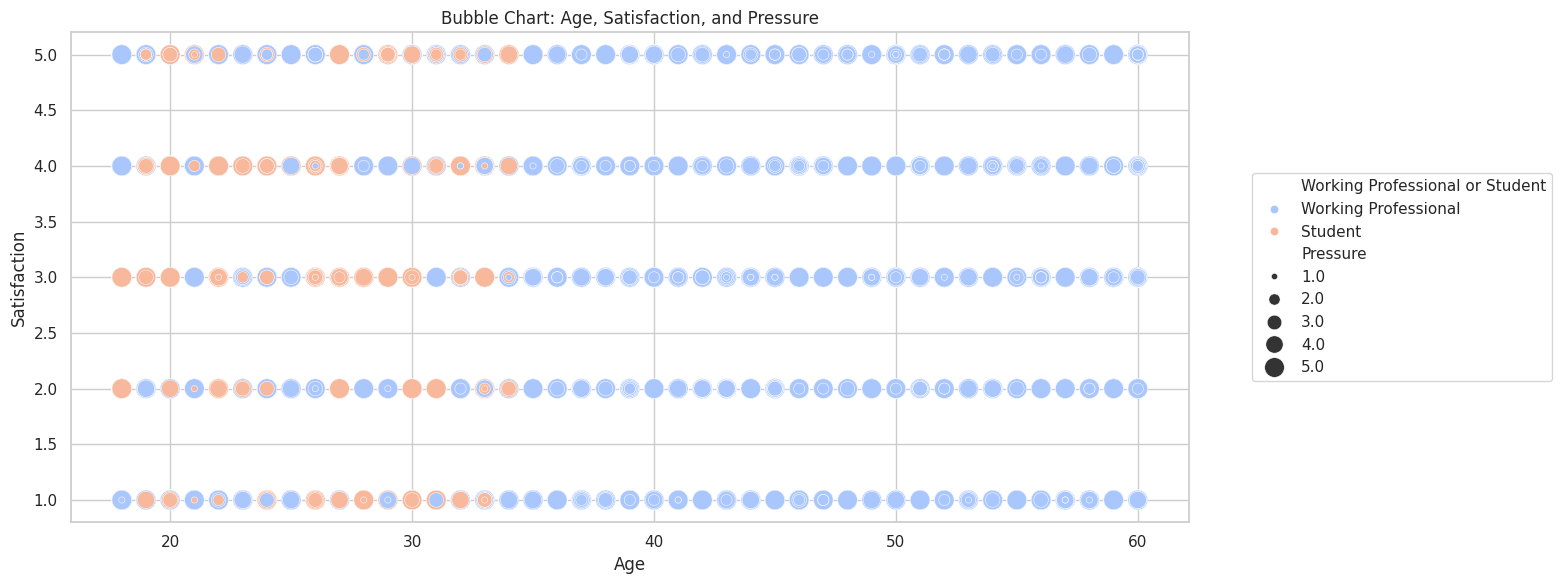

In [500]:
plt.figure(figsize=(20, 6))
sns.scatterplot(x='Age', y='Satisfaction', size='Pressure', data=data, 
                hue='Working Professional or Student', palette='coolwarm', 
                sizes=(20, 200))

plt.title('Bubble Chart: Age, Satisfaction, and Pressure')
plt.xlabel('Age')
plt.ylabel('Satisfaction')

plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5))
plt.tight_layout(rect=[0,0,0.8,1])  # Adjust layout

plt.show()

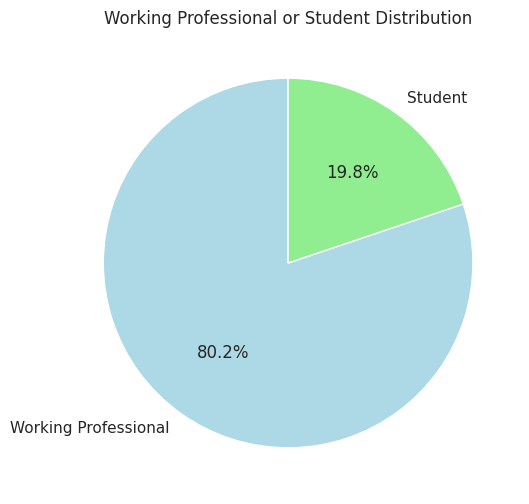

In [501]:
# 11. **Pie Chart for 'Working Professional or Student' distribution**
plt.figure(figsize=(6, 6))
data['Working Professional or Student'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen'])
plt.title('Working Professional or Student Distribution')
plt.ylabel('')
plt.show()

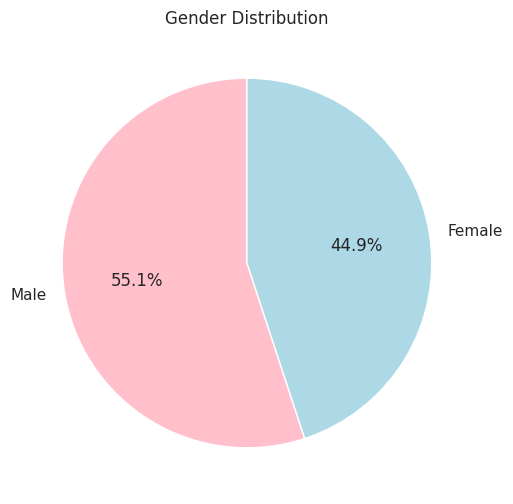

In [502]:

plt.figure(figsize=(6, 6))
data['Gender'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['pink', 'lightblue'])
plt.title('Gender Distribution')
plt.ylabel('')
plt.show()


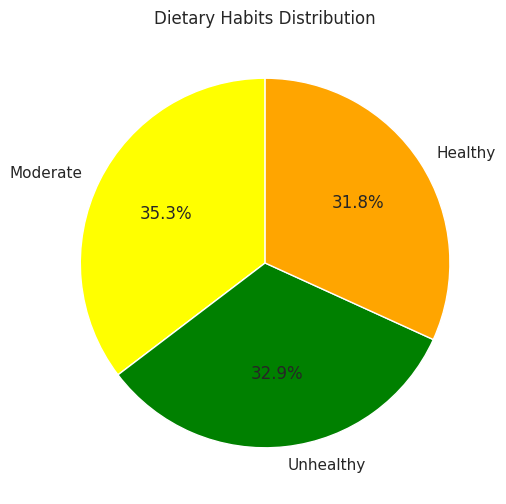

In [503]:

plt.figure(figsize=(6, 6))
data['Dietary Habits'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['yellow', 'green', 'orange'])
plt.title('Dietary Habits Distribution')
plt.ylabel('')
plt.show()

## 🗺️ City Distribution Visualization

In this section, we explore the geographical distribution of the data:  
- Generate a map to visualize the concentration of data points across cities.  
- Highlight regions with significant patterns or trends.  

In [504]:
# Initialize geolocator
geolocator = Nominatim(user_agent="city_map")

def get_coordinates(city):
    try:
        location = geolocator.geocode(city)
        if location:
            return location.latitude, location.longitude
        else:
            print(f"City not found: {city}")
            return None, None
    except Exception as e:
        print(f"Error geocoding {city}: {e}")
        return None, None


In [505]:
m = folium.Map(location=[20.5937, 78.9629], zoom_start=2)

for city in data['City'].unique():
    latitude, longitude = get_coordinates(city)
    if latitude and longitude:
       folium.Marker([latitude, longitude], popup=city).add_to(m)
m.save('city_distribution_map.html')
    
m


City not found: Ishanabad
City not found: Malyansh
Error geocoding 3.0: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=3.0&format=json&limit=1 (Caused by ReadTimeoutError("HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=1)"))
City not found: Less than 5 Kalyan
City not found: Moreadhyay
City not found: Ishkarsh
City not found: Tolkata
City not found: Ayansh
City not found: Nalyan
City not found: Galesabad
City not found: Itheg
City not found: Khaziabad
City not found: Unirar


In [506]:
data['Family History of Mental Illness'] = data['Family History of Mental Illness'].replace({'Yes': 1, 'No': 0})

/tmp/ipykernel_474/1189945905.py:1: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [507]:
data['Have you ever had suicidal thoughts ?'] = data['Have you ever had suicidal thoughts ?'].replace({'Yes': 1, 'No': 0})

/tmp/ipykernel_474/3826937041.py:1: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [508]:
fig = make_subplots(rows=1, cols=2, subplot_titles=['Depression', 'Suicidal Thoughts'])
fig.add_trace(go.Bar(x=data['Depression'].value_counts().index, y=data['Depression'].value_counts()), row=1, col=1)
fig.add_trace(go.Bar(x=data['Have you ever had suicidal thoughts ?'].value_counts().index, y=data['Have you ever had suicidal thoughts ?'].value_counts()), row=1, col=2)
fig.update_layout(title='Target Variable Distribution')
fig.show()

In [509]:
fig = px.imshow(pd.crosstab(data['Gender'], data['Depression']), text_auto=True)
fig.update_layout(title='Gender vs Depression')
fig.show()

fig = px.imshow(pd.crosstab(data['Gender'], data['Have you ever had suicidal thoughts ?']), text_auto=True)
fig.update_layout(title='Gender vs Suicidal thoughts ?')
fig.show()

fig = px.imshow(pd.crosstab(data['Working Professional or Student'], data['Depression']), text_auto=True)
fig.update_layout(title='Profession vs Depression')
fig.show()

fig = px.imshow(pd.crosstab(data['Working Professional or Student'], data['Have you ever had suicidal thoughts ?']), text_auto=True)
fig.update_layout(title='Profession vs Suicidal Thoughts')
fig.show()

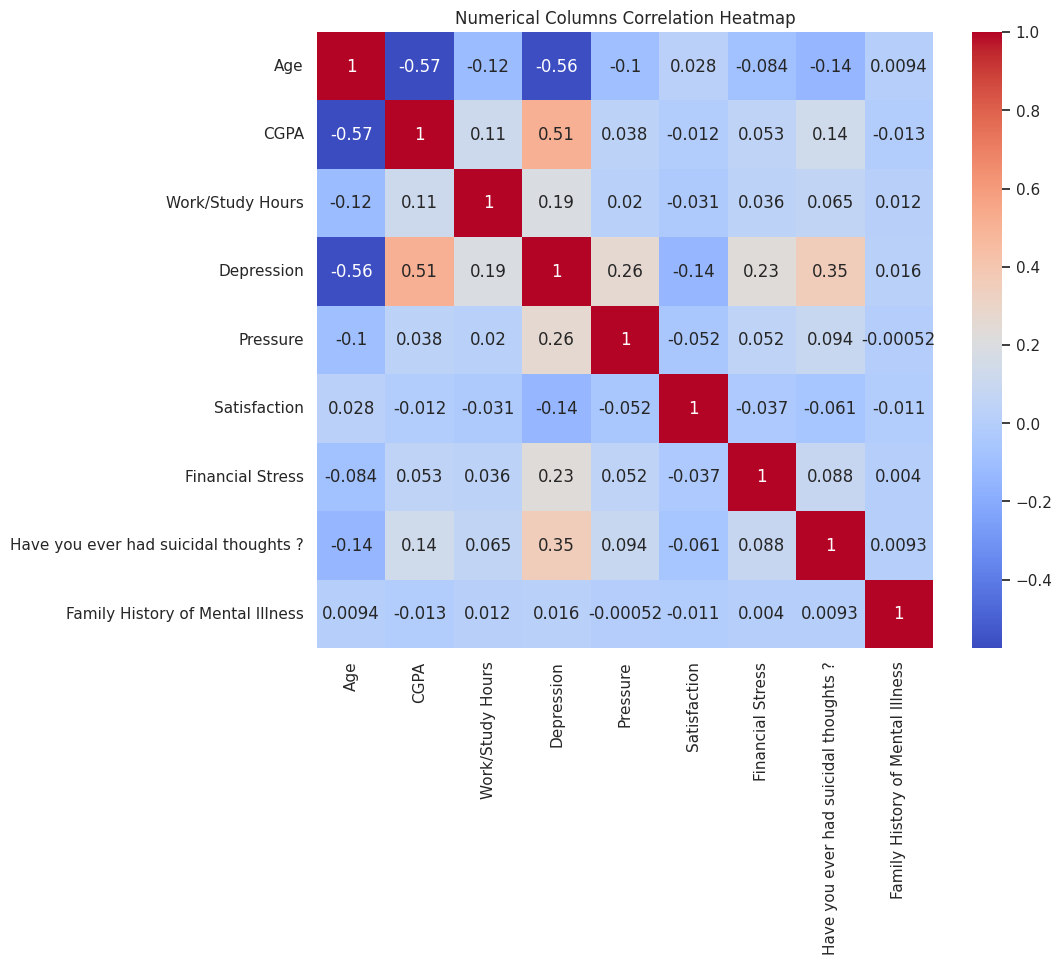

Correlation with Depression:
Depression                               1.000000
CGPA                                     0.514050
Have you ever had suicidal thoughts ?    0.349082
Pressure                                 0.263454
Financial Stress                         0.227249
Work/Study Hours                         0.191739
Family History of Mental Illness         0.016452
Satisfaction                            -0.142390
Age                                     -0.564665
Name: Depression, dtype: float64


In [510]:
numerical_cols = ['Age','CGPA', 'Work/Study Hours', 'Depression', 'Pressure', 'Satisfaction' ,'Financial Stress','Have you ever had suicidal thoughts ?','Family History of Mental Illness']
data_num = data[numerical_cols]

corr_matrix = data_num.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Numerical Columns Correlation Heatmap')
plt.show()

target_corr = corr_matrix['Depression'].sort_values(ascending=False)
print("Correlation with Depression:")
print(target_corr)


In [511]:
data.drop(columns=['id', 'Name'], inplace=True)

In [512]:
data.columns

Index(['Gender', 'Age', 'City', 'Working Professional or Student',
       'Profession', 'CGPA', 'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression',
       'Pressure', 'Satisfaction'],
      dtype='object')

In [513]:
X = data.drop(['Depression', 'City', 'Working Professional or Student',
               'Profession', 'CGPA', 'Sleep Duration', 
               'Dietary Habits', 'Degree','Gender'], axis=1)

y = data['Depression']

# Use only two classes for binary classification
X = X[y != 2]
y = y[y != 2]

In [514]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 🗜️ Support Vector Machine (SVM) Mode

Here, we train and evaluate an SVM model for classification:
- Hyperparameter tuning for kernel, C, and gamma.
- Performance analysis and comparison with other models.

In [515]:
# Initialize and train the SVM model
svm_model = SVC(kernel='linear', C=1.0)  # Linear kernel, regularization parameter C
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)

In [516]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9272081037853208

Confusion Matrix:
 [[22072   906]
 [ 1142  4015]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.96     22978
           1       0.82      0.78      0.80      5157

    accuracy                           0.93     28135
   macro avg       0.88      0.87      0.88     28135
weighted avg       0.93      0.93      0.93     28135



In [517]:
data.head(10)

Gender   Age           City Working Professional or Student  \
0  Female  49.0       Ludhiana            Working Professional   
1    Male  26.0       Varanasi            Working Professional   
2    Male  33.0  Visakhapatnam                         Student   
3    Male  22.0         Mumbai            Working Professional   
4  Female  30.0         Kanpur            Working Professional   
5  Female  59.0      Ahmedabad            Working Professional   
6    Male  47.0          Thane            Working Professional   
7    Male  38.0         Nashik            Working Professional   
8  Female  24.0      Bangalore                         Student   
9  Female  42.0          Patna            Working Professional   

            Profession  CGPA  Sleep Duration Dietary Habits   Degree  \
0                 Chef -1.00             9.0        Healthy      BHM   
1              Teacher -1.00             4.0      Unhealthy      LLB   
2              Student  8.97             5.5        Healthy  B.Pharm   
3              Teacher -1.00             4.0       Moderate      BBA   
4     Business Analyst -1.00             5.5      Unhealthy      BBA   
5  Finanancial Analyst -1.00             5.5        Healthy      MCA   
6              Chemist -1.00             7.5       Moderate       MD   
7              Teacher -1.00             7.5      Unhealthy  B.Pharm   
8              Student  5.90             5.5       Moderate      BSc   
9          Electrician -1.00             5.5        Healthy       ME   

   Have you ever had suicidal thoughts ?  Work/Study Hours  Financial Stress  \
0                                      0               1.0               2.0   
1                                      1               7.0               3.0   
2                                      1               3.0               1.0   
3                                      1              10.0               1.0   
4                                      1               9.0               4.0   
5                                      0               7.0               5.0   
6                                      0               6.0               2.0   
7                                      0              10.0               3.0   
8                                      0               3.0               2.0   
9                                      1               7.0               2.0   

   Family History of Mental Illness  Depression  Pressure  Satisfaction  
0                                 0           0       5.0           2.0  
1                                 0           1       4.0           3.0  
2                                 0           1       5.0           2.0  
3                                 1           1       5.0           1.0  
4                                 1           0       1.0           1.0  
5                                 0           0       2.0           5.0  
6                                 0           0       5.0           2.0  
7                                 1           0       3.0           4.0  
8                                 1           0       2.0           5.0  
9                                 1           0       4.0           1.0

In [518]:
dt_data = data.copy()

In [519]:
dt_data.head()

Gender   Age           City Working Professional or Student  \
0  Female  49.0       Ludhiana            Working Professional   
1    Male  26.0       Varanasi            Working Professional   
2    Male  33.0  Visakhapatnam                         Student   
3    Male  22.0         Mumbai            Working Professional   
4  Female  30.0         Kanpur            Working Professional   

         Profession  CGPA  Sleep Duration Dietary Habits   Degree  \
0              Chef -1.00             9.0        Healthy      BHM   
1           Teacher -1.00             4.0      Unhealthy      LLB   
2           Student  8.97             5.5        Healthy  B.Pharm   
3           Teacher -1.00             4.0       Moderate      BBA   
4  Business Analyst -1.00             5.5      Unhealthy      BBA   

   Have you ever had suicidal thoughts ?  Work/Study Hours  Financial Stress  \
0                                      0               1.0               2.0   
1                                      1               7.0               3.0   
2                                      1               3.0               1.0   
3                                      1              10.0               1.0   
4                                      1               9.0               4.0   

   Family History of Mental Illness  Depression  Pressure  Satisfaction  
0                                 0           0       5.0           2.0  
1                                 0           1       4.0           3.0  
2                                 0           1       5.0           2.0  
3                                 1           1       5.0           1.0  
4                                 1           0       1.0           1.0

In [530]:
dt_data.drop(['City', 'Profession', 'CGPA', 'Degree'], axis=1, inplace=True)

In [525]:
dt_data = pd.get_dummies(data, columns=['Gender', 'Working Professional or Student', 'Dietary Habits'], prefix=['Gender', 'Profession', 'Diet'])

In [526]:
columns_to_convert = ['Gender_Female', 'Gender_Male', 'Profession_Student', 
                      'Profession_Working Professional', 'Diet_Healthy','Diet_Moderate','Diet_Unhealthy']

for column in columns_to_convert:
    dt_data[column] = dt_data[column].astype(int)


## 🌲 Decision Tree Using Scikit-Learn

We implement a decision tree model using the Scikit-Learn library:
- Model training and visualization.
- Evaluation metrics and analysis of results.


In [531]:
# Split data
X = dt_data.drop('Depression', axis=1)
y = dt_data['Depression']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Decision Tree
clf = DecisionTreeClassifier(random_state=42)

# Train model
clf.fit(X_train, y_train)

# Evaluate model
y_pred = clf.predict(X_test)

In [532]:
# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Decision Tree Metrics
print("Decision Tree Metrics:")
print("Nodes:", clf.tree_.node_count)
print("Depth:", clf.tree_.max_depth)
print("Leaf Nodes:", clf.tree_.n_leaves)
print("Internal Nodes:", clf.tree_.node_count - clf.tree_.n_leaves)

# Additional Metrics (Precision, Recall, F1-score)
from sklearn.metrics import precision_score, recall_score, f1_score
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))

# ROC-AUC Score (for binary classification)
from sklearn.metrics import roc_auc_score
print("ROC-AUC Score:", roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1]))

Accuracy: 0.902079260707304
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94     22978
           1       0.73      0.75      0.74      5157

    accuracy                           0.90     28135
   macro avg       0.83      0.84      0.84     28135
weighted avg       0.90      0.90      0.90     28135

Confusion Matrix:
[[21518  1460]
 [ 1295  3862]]
Decision Tree Metrics:
Nodes: 21463
Depth: 25
Leaf Nodes: 10732
Internal Nodes: 10731
Precision: 0.7256670424652386
Recall: 0.7488850106651154
F1-score: 0.737093234087222
ROC-AUC Score: 0.8433337767180428


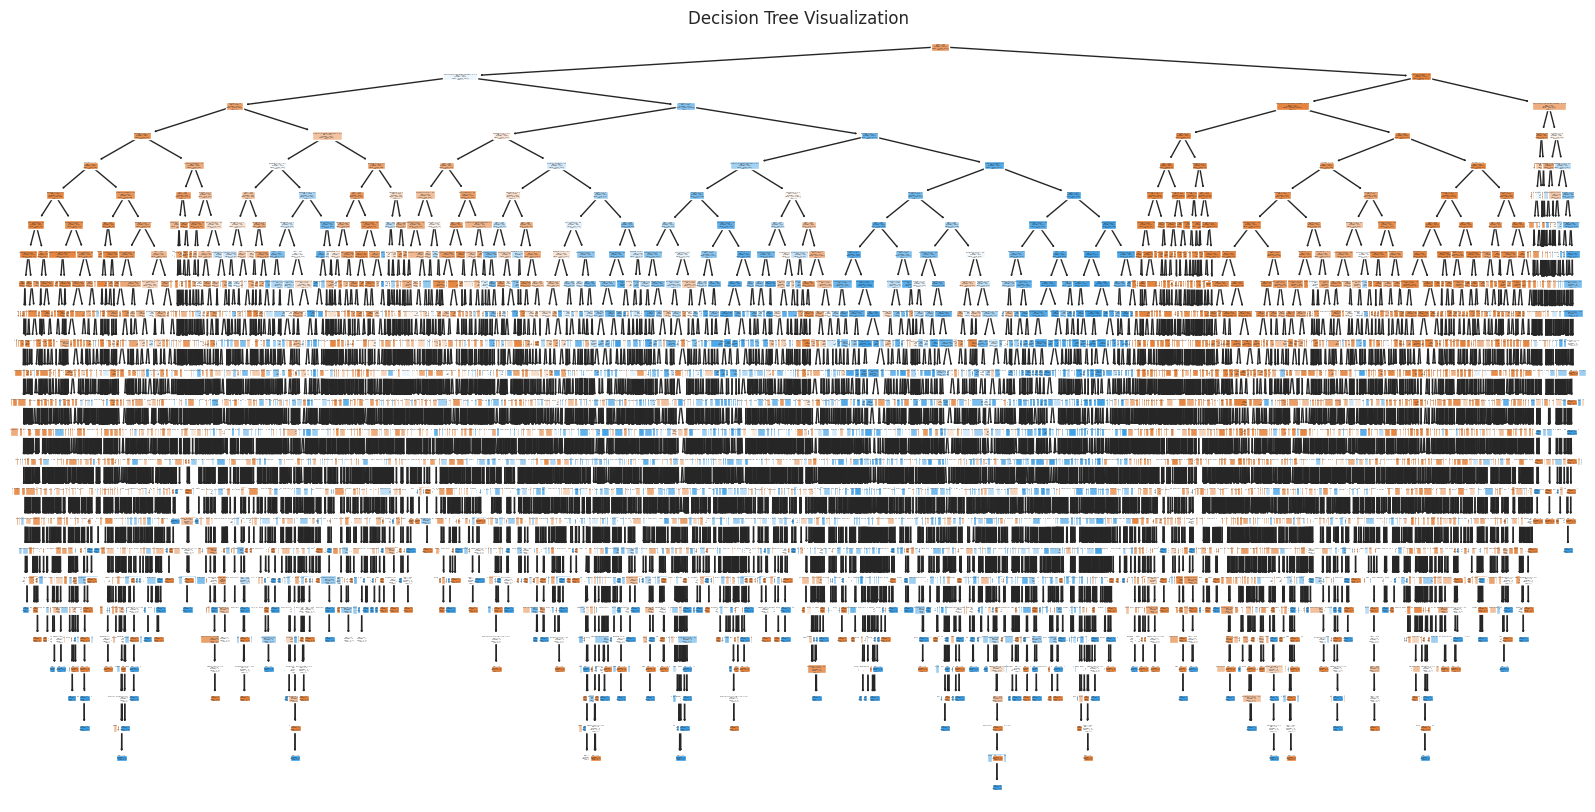

In [533]:
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=X.columns, class_names=['0', '1'], filled=True)
plt.title("Decision Tree Visualization")
plt.show()

In [534]:
dt_data.head()

Age  Sleep Duration  Have you ever had suicidal thoughts ?  \
0  49.0             9.0                                      0   
1  26.0             4.0                                      1   
2  33.0             5.5                                      1   
3  22.0             4.0                                      1   
4  30.0             5.5                                      1   

   Work/Study Hours  Financial Stress  Family History of Mental Illness  \
0               1.0               2.0                                 0   
1               7.0               3.0                                 0   
2               3.0               1.0                                 0   
3              10.0               1.0                                 1   
4               9.0               4.0                                 1   

   Depression  Pressure  Satisfaction  Gender_Female  Gender_Male  \
0           0       5.0           2.0              1            0   
1           1       4.0           3.0              0            1   
2           1       5.0           2.0              0            1   
3           1       5.0           1.0              0            1   
4           0       1.0           1.0              1            0   

   Profession_Student  Profession_Working Professional  Diet_Healthy  \
0                   0                                1             1   
1                   0                                1             0   
2                   1                                0             1   
3                   0                                1             0   
4                   0                                1             0   

   Diet_Moderate  Diet_Unhealthy  
0              0               0  
1              0               1  
2              0               0  
3              1               0  
4              0               1

In [535]:
dth_data = dt_data.copy()

In [536]:
dth_data.columns

Index(['Age', 'Sleep Duration', 'Have you ever had suicidal thoughts ?',
       'Work/Study Hours', 'Financial Stress',
       'Family History of Mental Illness', 'Depression', 'Pressure',
       'Satisfaction', 'Gender_Female', 'Gender_Male', 'Profession_Student',
       'Profession_Working Professional', 'Diet_Healthy', 'Diet_Moderate',
       'Diet_Unhealthy'],
      dtype='object')

In [537]:
X = dth_data.drop(['Depression',
               'Pressure', 'Satisfaction', 'Sleep Duration'
               ,'Age' ,'Work/Study Hours','Financial Stress',
               'Profession_Working Professional'
               ,'Gender_Female'], axis=1)

y = dth_data['Depression']

X = X[y != 2]
y = y[y != 2]

In [538]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.0005, random_state=42)

In [539]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

## 🌳 Decision Tree Without Scikit-Learn

In this section, we manually implement a decision tree algorithm from scratch:


- Splitting data based on feature thresholds.
- Recursive tree construction.
- Evaluation and comparison with Scikit-Learn's implementation.


In [540]:
def compute_entropy(y):
    entropy = 0.
    
    if len(y) == 0:
        return 0.0
    
    p1 = len(y[y == 1]) / len(y)
    
    if p1 == 0 or p1 == 1:
        return 0.0
    
    entropy = -p1 * np.log2(p1) - (1 - p1) * np.log2(1 - p1)    
    
    return entropy

In [541]:
print("Entropy at root node: ", compute_entropy(y_train))

Entropy at root node:  0.6838167127156742


In [542]:
print("First few elements of X_train:\n", X_train[:5])
print("Type of X_train:",type(X_train))

First few elements of X_train:
 [[1 0 0 0 0 0 1]
 [0 1 1 0 0 0 1]
 [1 0 0 0 0 0 1]
 [1 1 1 0 0 1 0]
 [0 0 1 0 0 0 1]]
Type of X_train: <class 'numpy.ndarray'>


In [543]:
print ('The shape of X_train is:', X_train.shape)
print ('The shape of y_train is: ', y_train.shape)
print ('Number of training examples (m):', len(X_train))

The shape of X_train is: (140604, 7)
The shape of y_train is:  (140604,)
Number of training examples (m): 140604


In [544]:
def split_dataset(X, node_indices, feature):

    
    left_indices = []
    right_indices = []
    
    for i in node_indices:   
        if X[i][feature] == 1:
            left_indices.append(i)
        else:
            right_indices.append(i)
        
    return left_indices, right_indices

In [545]:
root_indices = list(range(len(y_train))) 
feature = 0  

left_indices, right_indices = split_dataset(X_train, root_indices, feature)

print("CASE 1:")
print("Left indices: ", left_indices)
print("Right indices: ", right_indices)

CASE 1:
Left indices:  [0, 2, 3, 7, 15, 16, 17, 19, 20, 21, 25, 31, 33, 34, 38, 39, 41, 42, 45, 52, 53, 54, 56, 58, 61, 62, 63, 64, 69, 70, 74, 75, 76, 77, 79, 84, 86, 87, 90, 91, 93, 94, 96, 100, 103, 105, 106, 107, 111, 112, 113, 117, 121, 124, 126, 127, 130, 138, 143, 144, 146, 147, 149, 150, 151, 153, 157, 158, 162, 163, 166, 167, 170, 171, 172, 174, 176, 177, 187, 188, 189, 190, 191, 196, 198, 199, 203, 207, 208, 211, 213, 214, 215, 217, 220, 222, 224, 225, 226, 229, 232, 233, 237, 238, 239, 240, 242, 243, 246, 248, 249, 250, 253, 254, 256, 257, 260, 264, 265, 266, 267, 270, 274, 275, 276, 280, 281, 284, 285, 286, 288, 289, 291, 293, 294, 295, 300, 301, 302, 306, 308, 311, 314, 318, 320, 321, 323, 328, 329, 330, 331, 332, 335, 336, 337, 339, 340, 341, 345, 346, 351, 356, 357, 361, 362, 363, 366, 368, 369, 370, 371, 372, 375, 378, 380, 384, 388, 393, 401, 402, 405, 406, 407, 408, 409, 410, 412, 417, 421, 422, 423, 425, 427, 428, 429, 430, 432, 443, 444, 445, 446, 452, 453, 455, 456

In [546]:
def compute_information_gain(X, y, node_indices, feature):

    left_indices, right_indices = split_dataset(X, node_indices, feature)
    
    X_node, y_node = X[node_indices], y[node_indices]
    X_left, y_left = X[left_indices], y[left_indices]
    X_right, y_right = X[right_indices], y[right_indices]
    
    information_gain = 0

    node_entropy = compute_entropy(y_node)

    left_entropy = compute_entropy(y_left)

    right_entropy = compute_entropy(y_right)

    w_left = len(X_left)/len(X_node)

    w_right = len(X_right)/len(X_node)
    
    weighted_entropy = w_left * left_entropy + w_right * right_entropy

    information_gain = node_entropy - weighted_entropy 

    
    return information_gain

In [547]:
X.head()

Have you ever had suicidal thoughts ?  Family History of Mental Illness  \
0                                      0                                 0   
1                                      1                                 0   
2                                      1                                 0   
3                                      1                                 1   
4                                      1                                 1   

   Gender_Male  Profession_Student  Diet_Healthy  Diet_Moderate  \
0            0                   0             1              0   
1            1                   0             0              0   
2            1                   1             1              0   
3            1                   0             0              1   
4            0                   0             0              0   

   Diet_Unhealthy  
0               0  
1               1  
2               0  
3               0  
4               1

In [548]:
info_gain0 = compute_information_gain(X_train, y_train, root_indices, feature=0)
print("Information Gain from splitting the root on suicidal thoughts: ", info_gain0)

info_gain1 = compute_information_gain(X_train, y_train, root_indices, feature=1)
print("Information Gain from splitting the root on History of Mental Illness: ", info_gain1)

info_gain2 = compute_information_gain(X_train, y_train, root_indices, feature=2)
print("Information Gain from splitting the root on Gender_Female: ", info_gain2)

Information Gain from splitting the root on suicidal thoughts:  0.09600787152453316
Information Gain from splitting the root on History of Mental Illness:  0.00019522825122120224
Information Gain from splitting the root on Gender_Female:  4.8882383945070274e-05


In [549]:
def get_best_split(X, y, node_indices):   
  
    num_features = X.shape[1]

    best_feature = -1

    max_info_gain = 0

    for feature in range(num_features): 

        info_gain = compute_information_gain(X, y, node_indices, feature)

        if info_gain > max_info_gain:  

            max_info_gain = info_gain
            best_feature = feature   
   
    return best_feature

In [550]:
best_feature = get_best_split(X_train, y_train, root_indices)
print("Best feature to split on: %d" % best_feature)
print('Which is Profession_Student coulmn')

Best feature to split on: 3
Which is Profession_Student coulmn


In [551]:
tree = []

def build_tree_recursive(X, y, node_indices, branch_name, max_depth, current_depth):
    """
    Build a tree using the recursive algorithm that split the dataset into 2 subgroups at each node.
    This function just prints the tree.
    """ 
    # Maximum depth reached - stop splitting
    if current_depth == max_depth:
        formatting = " "*current_depth + "-"*current_depth
        print(formatting, "%s leaf node with indices" % branch_name, node_indices)
        return
   
    # Otherwise, get best split and split the data
    # Get the best feature and threshold at this node
    best_feature = get_best_split(X, y, node_indices) 
    
    formatting = "-"*current_depth
    print("%s Depth %d, %s: Split on feature: %d" % (formatting, current_depth, branch_name, best_feature))
    
    # Split the dataset at the best feature
    left_indices, right_indices = split_dataset(X, node_indices, best_feature)
    tree.append((left_indices, right_indices, best_feature))
    
    # continue splitting the left and the right child. Increment current depth
    build_tree_recursive(X, y, left_indices, "Left", max_depth, current_depth+1)
    build_tree_recursive(X, y, right_indices, "Right", max_depth, current_depth+1)

In [552]:
max_depth = 1
build_tree_recursive(X_train, y_train, root_indices, "Root", max_depth, current_depth=0)

 Depth 0, Root: Split on feature: 3
 - Left leaf node with indices [29, 39, 41, 42, 53, 61, 64, 74, 77, 78, 79, 81, 86, 88, 102, 107, 111, 115, 118, 130, 135, 138, 143, 149, 150, 151, 157, 158, 164, 165, 170, 171, 172, 208, 209, 210, 213, 216, 220, 225, 226, 229, 231, 244, 246, 249, 255, 268, 271, 272, 280, 284, 290, 292, 295, 300, 308, 316, 330, 331, 332, 334, 340, 341, 348, 351, 359, 361, 363, 369, 389, 396, 400, 401, 406, 412, 416, 421, 422, 431, 435, 443, 446, 449, 455, 458, 468, 472, 481, 483, 485, 486, 495, 496, 500, 509, 510, 514, 527, 534, 536, 540, 557, 563, 578, 580, 585, 598, 599, 600, 602, 608, 609, 621, 622, 629, 630, 636, 640, 647, 666, 668, 673, 676, 683, 690, 697, 698, 713, 724, 728, 729, 730, 731, 734, 736, 739, 742, 743, 746, 751, 754, 758, 769, 772, 780, 784, 793, 800, 802, 810, 811, 813, 817, 818, 819, 835, 844, 845, 846, 851, 852, 854, 864, 867, 869, 870, 876, 882, 884, 885, 890, 893, 894, 896, 900, 906, 907, 911, 912, 919, 923, 925, 926, 929, 940, 941, 943, 944, 9

In [553]:
def predict(X):
    predictions = []
    for sample in X:
        # Traverse the tree
        node_indices = np.arange(X_train.shape[0])
        current_depth = 0
        while current_depth < max_depth:
            best_feature = get_best_split(X_train, y_train, node_indices)
            left_indices, right_indices = split_dataset(X_train, node_indices, best_feature)
            
            # Determine child node
            if sample[best_feature] < X_train[node_indices, best_feature].mean():
                node_indices = left_indices
            else:
                node_indices = right_indices
            print(current_depth)
            current_depth += 1
        
        # Predict class label
        predictions.append(np.bincount(y_train[node_indices]).argmax())
        print('pred',predictions)
    return np.array(predictions)

In [554]:
y_pred = predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

0
pred [np.int64(1)]
0
pred [np.int64(1), np.int64(1)]
0
pred [np.int64(1), np.int64(1), np.int64(1)]
0
pred [np.int64(1), np.int64(1), np.int64(1), np.int64(1)]
0
pred [np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1)]
0
pred [np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1)]
0
pred [np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1)]
0
pred [np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1)]
0
pred [np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1)]
0
pred [np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1)]
0
pred [np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(0)]
0
pred [np.int64(1), np.int64(1), np.int64(1), np.int6

In [555]:
def predict_sample(sample):
    node_indices = np.arange(X_train.shape[0])
    current_depth = 0
    while current_depth < max_depth and len(node_indices) > 1:
        best_feature = get_best_split(X_train, y_train, node_indices)
        left_indices, right_indices = split_dataset(X_train, node_indices, best_feature)
        
        # Determine child node
        if sample[best_feature] < X_train[node_indices, best_feature].mean():
            node_indices = left_indices
        else:
            node_indices = right_indices
        
        current_depth += 1
    
    # Predict class label
    return np.bincount(y_train[node_indices]).argmax()

def predict_parallel(X):
    predictions = Parallel(n_jobs=-1)(delayed(predict_sample)(sample) for sample in X)
    return np.array(predictions)

In [556]:
y_pred = predict_parallel(X_test)

# Evaluate accuracy
accuracy = np.mean(y_pred == y_test)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.1267605633802817
Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.09      0.14        57
           1       0.07      0.29      0.11        14

    accuracy                           0.13        71
   macro avg       0.20      0.19      0.13        71
weighted avg       0.28      0.13      0.13        71



In [557]:
nn_data = dt_data.copy()

In [558]:
nn_data.head()

Age  Sleep Duration  Have you ever had suicidal thoughts ?  \
0  49.0             9.0                                      0   
1  26.0             4.0                                      1   
2  33.0             5.5                                      1   
3  22.0             4.0                                      1   
4  30.0             5.5                                      1   

   Work/Study Hours  Financial Stress  Family History of Mental Illness  \
0               1.0               2.0                                 0   
1               7.0               3.0                                 0   
2               3.0               1.0                                 0   
3              10.0               1.0                                 1   
4               9.0               4.0                                 1   

   Depression  Pressure  Satisfaction  Gender_Female  Gender_Male  \
0           0       5.0           2.0              1            0   
1           1       4.0           3.0              0            1   
2           1       5.0           2.0              0            1   
3           1       5.0           1.0              0            1   
4           0       1.0           1.0              1            0   

   Profession_Student  Profession_Working Professional  Diet_Healthy  \
0                   0                                1             1   
1                   0                                1             0   
2                   1                                0             1   
3                   0                                1             0   
4                   0                                1             0   

   Diet_Moderate  Diet_Unhealthy  
0              0               0  
1              0               1  
2              0               0  
3              1               0  
4              0               1

In [559]:
nn_data.drop(['Gender_Male','Profession_Working Professional'], axis =1)

Age  Sleep Duration  Have you ever had suicidal thoughts ?  \
0       49.0             9.0                                      0   
1       26.0             4.0                                      1   
2       33.0             5.5                                      1   
3       22.0             4.0                                      1   
4       30.0             5.5                                      1   
...      ...             ...                                    ...   
140695  18.0             5.5                                      0   
140696  41.0             7.5                                      1   
140697  24.0             9.0                                      0   
140698  49.0             5.5                                      1   
140699  27.0             4.0                                      1   

        Work/Study Hours  Financial Stress  Family History of Mental Illness  \
0                    1.0               2.0                                 0   
1                    7.0               3.0                                 0   
2                    3.0               1.0                                 0   
3                   10.0               1.0                                 1   
4                    9.0               4.0                                 1   
...                  ...               ...                               ...   
140695               2.0               4.0                                 1   
140696               6.0               5.0                                 1   
140697               4.0               4.0                                 0   
140698              10.0               1.0                                 0   
140699               2.0               3.0                                 1   

        Depression  Pressure  Satisfaction  Gender_Female  Profession_Student  \
0                0       5.0           2.0              1                   0   
1                1       4.0           3.0              0                   0   
2                1       5.0           2.0              0                   1   
3                1       5.0           1.0              0                   0   
4                0       1.0           1.0              1                   0   
...            ...       ...           ...            ...                 ...   
140695           1       5.0           4.0              1                   0   
140696           0       5.0           4.0              1                   0   
140697           0       3.0           1.0              1                   0   
140698           0       5.0           2.0              1                   0   
140699           1       4.0           1.0              0                   1   

        Diet_Healthy  Diet_Moderate  Diet_Unhealthy  
0                  1              0               0  
1                  0              0               1  
2                  1              0               0  
3                  0              1               0  
4                  0              0               1  
...              ...            ...             ...  
140695             0              0               1  
140696             0              1               0  
140697             0              1               0  
140698             0              1               0  
140699             1              0               0  

[140675 rows x 14 columns]

## 🤖 Neural Network Model

We build and train a Neural Network to classify mental health data:
- Model architecture and training.
- Evaluation metrics: accuracy, precision, recall, and F1-score.
- Visualization of loss and accuracy over epochs.

In [560]:
scaler = MinMaxScaler()
nn_data[['Age', 'Sleep Duration', 'Work/Study Hours', 'Financial Stress', 'Family History of Mental Illness', 'Pressure', 'Satisfaction']] = scaler.fit_transform(nn_data[['Age', 'Sleep Duration', 'Work/Study Hours', 'Financial Stress', 'Family History of Mental Illness', 'Pressure', 'Satisfaction']])

# Split data
X = nn_data.drop('Depression', axis=1)
y = nn_data['Depression']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [561]:
# Define neural network model for binary classification
model = Sequential([
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])


# Compile the model with BinaryCrossentropy
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=['accuracy']
)

# Train the model
model.fit(X_train, y_train, epochs=10)

# Make predictions
y_pred = model.predict(X_test)

# Convert probabilities to binary predictions
y_pred_class = (y_pred > 0.5).astype("int32")

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_class)
precision = precision_score(y_test, y_pred_class)
recall = recall_score(y_test, y_pred_class)
f1 = f1_score(y_test, y_pred_class)

# Print metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Epoch 1/10
3517/3517 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.9196 - loss: 0.1999
Epoch 2/10
3517/3517 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - accuracy: 0.9360 - loss: 0.1606
Epoch 3/10
3517/3517 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - accuracy: 0.9365 - loss: 0.1572
Epoch 4/10
3517/3517 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - accuracy: 0.9369 - loss: 0.1561
Epoch 5/10
3517/3517 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - accuracy: 0.9372 - loss: 0.1557
Epoch 6/10
3517/3517 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - accuracy: 0.9368 - loss: 0.1580
Epoch 7/10
3517/3517 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - accuracy: 0.9381 - loss: 0.1557
Epoch 8/10
3517/3517 ━━━━━━━━━━━━━━━━━━━━ 17s 5ms/step - accuracy: 0.9369 - loss: 0.1578
Epoch 9/10
3517/3517 ━━━━━━━━━━━━━━━━━━━━ 17s 5ms/step - accuracy: 0.9394 - loss: 0.1533
Epoch 10/10
3517/3517 ━━━━━━━━━━━━━━━━━━━━ 17s 5ms/step - accuracy: 0.9386 - loss: 0.1536
880/880 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
Accuracy: 0.9392571530122623
Precision: 0.8376419898159029
Recall: 0

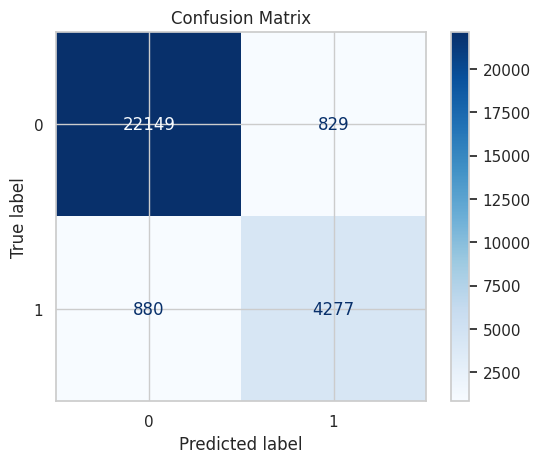

In [562]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_class)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

## 🔢 k-Nearest Neighbors (kNN)

In [565]:
dt_data.head()

Age  Sleep Duration  Have you ever had suicidal thoughts ?  \
0  49.0             9.0                                      0   
1  26.0             4.0                                      1   
2  33.0             5.5                                      1   
3  22.0             4.0                                      1   
4  30.0             5.5                                      1   

   Work/Study Hours  Financial Stress  Family History of Mental Illness  \
0               1.0               2.0                                 0   
1               7.0               3.0                                 0   
2               3.0               1.0                                 0   
3              10.0               1.0                                 1   
4               9.0               4.0                                 1   

   Depression  Pressure  Satisfaction  Gender_Female  Gender_Male  \
0           0       5.0           2.0              1            0   
1           1       4.0           3.0              0            1   
2           1       5.0           2.0              0            1   
3           1       5.0           1.0              0            1   
4           0       1.0           1.0              1            0   

   Profession_Student  Profession_Working Professional  Diet_Healthy  \
0                   0                                1             1   
1                   0                                1             0   
2                   1                                0             1   
3                   0                                1             0   
4                   0                                1             0   

   Diet_Moderate  Diet_Unhealthy  
0              0               0  
1              0               1  
2              0               0  
3              1               0  
4              0               1

In [566]:
# Scale the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [567]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [568]:
y_pred = knn.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9127776790474498
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     22978
           1       0.86      0.63      0.72      5157

    accuracy                           0.91     28135
   macro avg       0.89      0.80      0.84     28135
weighted avg       0.91      0.91      0.91     28135



In [569]:
k_values = range(2, 5)
accuracy_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

# عرض النتائج
for k, acc in zip(k_values, accuracy_scores):
    print(f"k={k}, Accuracy={acc}")


k=2, Accuracy=0.9127776790474498
k=3, Accuracy=0.9251821574551271
k=4, Accuracy=0.9248622711924649


In [570]:
metrics = ['euclidean', 'manhattan', 'chebyshev']
for metric in metrics:
    knn = KNeighborsClassifier(n_neighbors=3, metric=metric)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    print(f"Metric={metric}, Accuracy={accuracy_score(y_test, y_pred)}")


Metric=euclidean, Accuracy=0.9251821574551271
Metric=manhattan, Accuracy=0.9244002132575084
Metric=chebyshev, Accuracy=0.923938155322552


## 🤔 Naive Bayes

The Naive Bayes algorithm is a probabilistic classifier:  
- Assumes conditional independence between features given the target label.  
- Suitable for text classification and other categorical data problems. 

In [571]:
nb_model  = GaussianNB()
nb_model .fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_nb)
conf_matrix = confusion_matrix(y_test, y_pred_nb)
class_report = classification_report(y_test, y_pred_nb)

print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

Accuracy: 0.8769504176292874

Confusion Matrix:
 [[20628  2350]
 [ 1112  4045]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.90      0.92     22978
           1       0.63      0.78      0.70      5157

    accuracy                           0.88     28135
   macro avg       0.79      0.84      0.81     28135
weighted avg       0.89      0.88      0.88     28135



## 🌳 Random Forest Method

The Random Forest algorithm is a powerful ensemble learning technique:  
- Combines multiple decision trees to improve classification performance.  
- Reduces overfitting by averaging predictions from individual trees.  
- Provides feature importance scores for better interpretability

### 🎲 Multiple Runs for Accuracy:
- Random Forest introduces randomness in the bootstrapping process and feature selection at each split.  
- Results may vary slightly with each run due to this stochastic nature.  
- To obtain consistent results, set a random seed using the `random_state` parameter.  


In [575]:
data_copy = dt_data.copy()

scaler = MinMaxScaler()

data_copy[['Age', 'Sleep Duration', 'Work/Study Hours', 'Financial Stress', 'Family History of Mental Illness', 'Pressure', 'Satisfaction']] = scaler.fit_transform(data_copy[['Age', 'Sleep Duration', 'Work/Study Hours', 'Financial Stress', 'Family History of Mental Illness', 'Pressure', 'Satisfaction']])

# Display the normalized copy
data_copy.head(5)

Age  Sleep Duration  Have you ever had suicidal thoughts ?  \
0  0.738095        0.823529                                      0   
1  0.190476        0.235294                                      1   
2  0.357143        0.411765                                      1   
3  0.095238        0.235294                                      1   
4  0.285714        0.411765                                      1   

   Work/Study Hours  Financial Stress  Family History of Mental Illness  \
0          0.083333              0.25                               0.0   
1          0.583333              0.50                               0.0   
2          0.250000              0.00                               0.0   
3          0.833333              0.00                               1.0   
4          0.750000              0.75                               1.0   

   Depression  Pressure  Satisfaction  Gender_Female  Gender_Male  \
0           0      1.00          0.25              1            0   
1           1      0.75          0.50              0            1   
2           1      1.00          0.25              0            1   
3           1      1.00          0.00              0            1   
4           0      0.00          0.00              1            0   

   Profession_Student  Profession_Working Professional  Diet_Healthy  \
0                   0                                1             1   
1                   0                                1             0   
2                   1                                0             1   
3                   0                                1             0   
4                   0                                1             0   

   Diet_Moderate  Diet_Unhealthy  
0              0               0  
1              0               1  
2              0               0  
3              1               0  
4              0               1

In [576]:
# Encode categorical variables
label_encoders = {}
for column in data_copy.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data_copy[column] = le.fit_transform(data_copy[column])
    label_encoders[column] = le

# Separate features and target variable
X = data_copy.drop('Have you ever had suicidal thoughts ?', axis=1)  # Ensure the column name matches exactly
y = data_copy['Have you ever had suicidal thoughts ?']  # Ensure the column name matches exactly

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [579]:
# Create and train the Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

In [580]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Accuracy: 0.6069473734094732
Confusion Matrix:
 [[14862  6508]
 [10080 10753]]
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.70      0.64     21370
           1       0.62      0.52      0.56     20833

    accuracy                           0.61     42203
   macro avg       0.61      0.61      0.60     42203
weighted avg       0.61      0.61      0.60     42203



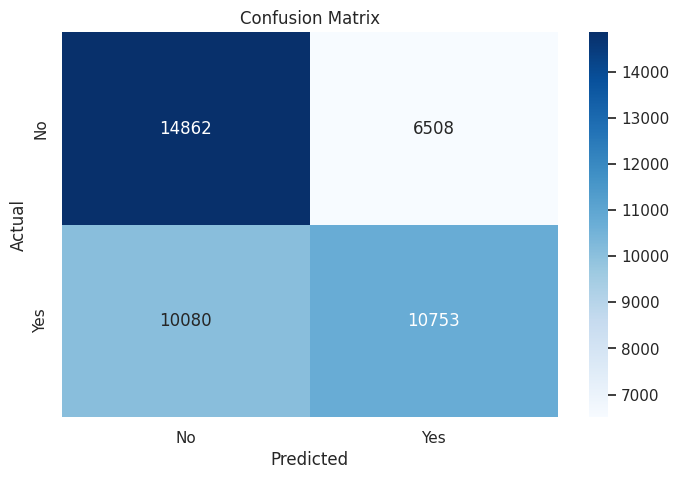

In [581]:
# Confusion Matrix
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

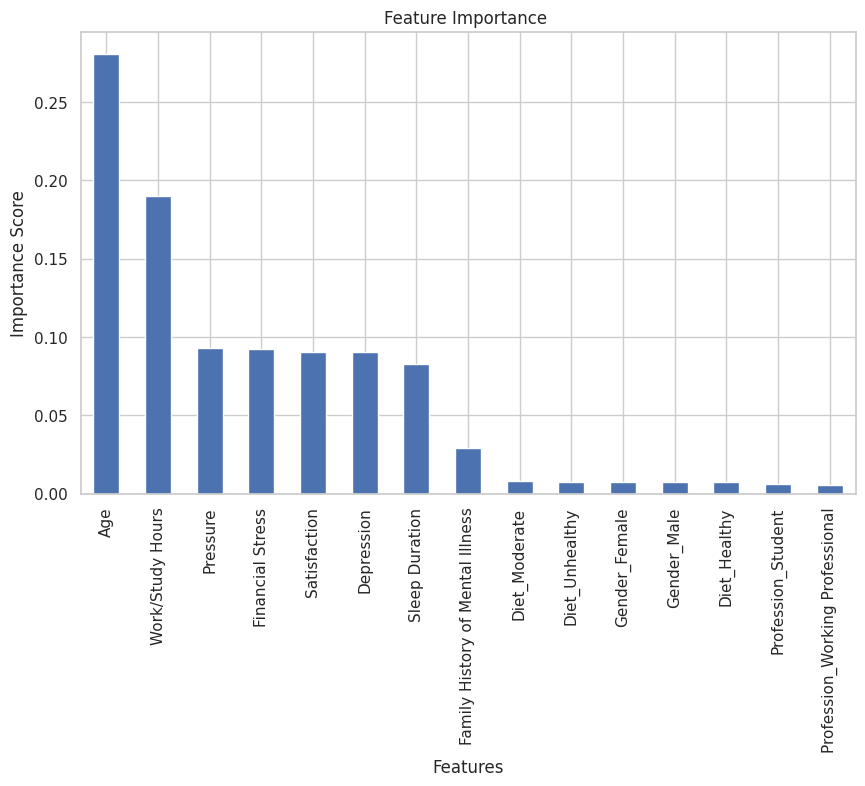

In [582]:
# Feature importance
feature_importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
feature_importances.plot(kind='bar')
plt.title('Feature Importance ')
plt.ylabel('Importance Score')
plt.xlabel('Features')
plt.show()

## 📈 Logistic Regression

Logistic Regression is a simple yet effective classification method:  
- Models the probability of the target variable belonging to a class using a sigmoid function.  
- Suitable for binary classification and extended to multiclass problems using techniques like one-vs-rest (OvR).  

In [583]:
# Encode categorical variables
label_encoders = {}
for column in data_copy.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data_copy[column] = le.fit_transform(data_copy[column])
    label_encoders[column] = le

# Split features and target variable
X = data_copy.drop('Depression', axis=1)  # Features
y = data_copy['Depression']  # Target variable

In [584]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [585]:
# Create and train the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)  # Increase max_iter if needed
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [586]:
# Make predictions on the test set
y_pred = log_reg.predict(X_test)

In [587]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Accuracy: 0.9386062602184679
Confusion Matrix:
 [[33423  1139]
 [ 1452  6189]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.96     34562
           1       0.84      0.81      0.83      7641

    accuracy                           0.94     42203
   macro avg       0.90      0.89      0.89     42203
weighted avg       0.94      0.94      0.94     42203



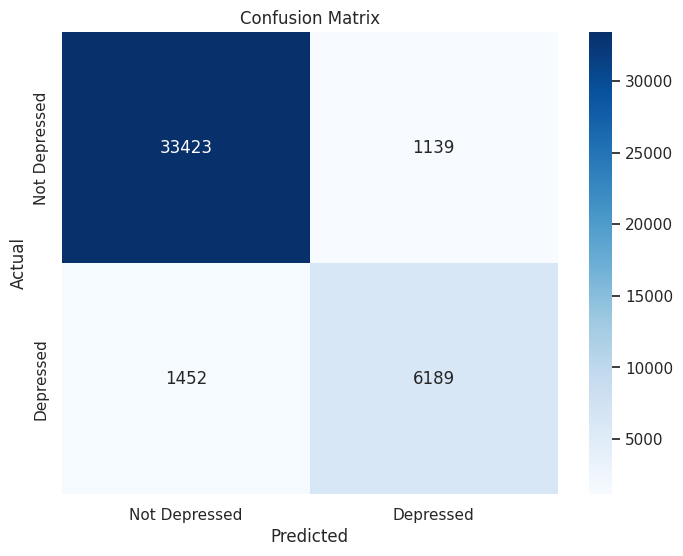

In [588]:
# Visualization: Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Depressed', 'Depressed'], 
            yticklabels=['Not Depressed', 'Depressed'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()